---
title: "IMDB TOP 1000"
author: "Group1"
date: "12/01/2021"
output:
  html_document:
    df_print: paged
  pdf_document: default
---

In [1]:
knitr::opts_chunk$set(warning = FALSE, message = FALSE)
library(knitr)
library(tidyverse)
library(stringr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# 1. Background Information

IMDB Top 1000s Movies: This dataset is composed of the top 1000 highest-rated movies on IMDB. The ratings are scored 1 to 10, with decimal places allowing further distinction.  The scored ratings come from registered users on IMDb, not professional critics. This allows for a wisdom of the crowd effect to take place, where the highest-rated movies are generally blockbusters that appeal to large demographics and audiences.

We found this data as a .csv file on Kaggle, a data science community with free-to-use public datasets. All of the data in this dataset is scraped directly from IMDb, which is an online database and community centered around movies and TV shows. The data was scraped on January 31, 2021, so it is not entirely up to date.

Accompanying the IMDb score, the Metacritic score contrasts the site user-generated rating, with an aggregate score out of 100, fueled by the responses of professional critics across the industry. Metacritic averages the sentiments of these writers, in order to create its “Metascore.” This score holds its value in the fact that it’s created from an average of professional writers whose very career relies on the quality of reviews they write. 
This differencing score acts as a reflection between the opinions of the masses vs the professional critics, allowing comparisons between these often contrasting opinions. Where mass audiences often value entertainment value and popularity, professional critics put heavy emphasis on novel artistic experiences. 
	It is in the best interest of the film studio to receive a high rating on ratings on both, as audiences generally check online ratings, before choosing to spend their money at the theatre to view the film. Higher-rated films usually fend better in the movie industry, creating a demand for people to view them. 
	This leads to our next important variable in the data set, gross box office revenue. This data set includes numerical values for the movie’s international gross revenue. Gross box office revenue is the money that the film generated from audiences attending the theatre to view it on the “big screen”. The primary goal of the movie studio is to generate a profit from its products, so this variable acts as a measuring stick for their success. 


## 1.1 Project objective

Overall, the primary function of this project is the collection of review scores and how they correlate with the gross revenue generated by the film. This data set allows us to assess not only the accuracy of scores, but what rating system has led to better results. And while obviously some of these films premiered before the advent of the websites that host their scores, it will still act as an indicator of what traits led to their success (or failure).

## 1.2 Variables

1. Series_Title: This is the name of the movie that was entered into the IMDb website. It should be noted that some of the foreign films have their name listed in their original language (i.e. the 2019 film that U.S. audiences know as “Parasite”, is listed as “Gisaengchung”, its original name in Korean) 

2. Released_Year: This is the year that the movie was officially released in theatre for audiences to watch.

3. Runtime: The length of the film measured in minutes.

4. Genre: The genre of film that is listed on IMDb. This variable allows for quality analysis on what types of films are in the data set. 


5. No_of_Votes: Total number of reviews the film has received on IMDb. This is another good initiator of the popularity of a film. 

6. Gross: The international gross box office revenue that the film generated while in theatres. 

7. Stars(1-4): Categorical data for are the leading actors in the film. 

8. Directors: Categorical data for who directed the film.


## 1.3 Unused Variables

9. Poster Link: Links to a webpage showing the movie’s advertisement poster. 

Certificate: Based on their content, films are rated for what age demographics should be viewing them. This data set mixes multiple countries and regulating bodies’ methods of classifying films, so it is extremely difficult to make each rating equivalent. As such, we have decided to leave it out of the analyzed data. 

10. Overview: A brief description of the plot of the film.

In [2]:
imdb_top_1000 <- read_csv("imdb_top_1000.csv")

Rows: 1000 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Poster_Link, Series_Title, Released_Year, Certificate, Runtime, Ge...
dbl  (3): IMDB_Rating, Meta_score, No_of_Votes
num  (1): Gross

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 1.4 Data Cleaning

When we first got our data, there are a few problem with the original data set that need to be solve. First, in the original data set all the Genre are combine in the same column for example (Drama,Action) which make the data hard to use, to solve that problem we use the separate function to separate the Genre into "Genre1","Genre2","Genre3". Secondly, in the original data set Runtime and Released_Year both come as a character data which made us can’t do any observation with it, to solve this problem we use as.numeric function and mutate the whole column.

In [3]:
filtered_data <- imdb_top_1000 %>%
  separate(Genre, c("Genre1", "Genre2", "Genre3"), ", ", fill = "right") %>%
  mutate(
    Runtime = str_remove_all(Runtime, "min"),
    Runtime = as.numeric(Runtime),
    Released_Year = as.numeric(Released_Year)
  )

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `Released_Year = as.numeric(Released_Year)`.
Caused by warning:
! NAs introduced by coercion"


Here's brief summary of the filtered dataset in each column

In [4]:
filtered_data %>% 
  summary()

 Poster_Link        Series_Title       Released_Year  Certificate       
 Length:1000        Length:1000        Min.   :1920   Length:1000       
 Class :character   Class :character   1st Qu.:1976   Class :character  
 Mode  :character   Mode  :character   Median :1999   Mode  :character  
                                       Mean   :1991                     
                                       3rd Qu.:2009                     
                                       Max.   :2020                     
                                       NA's   :1                        
    Runtime         Genre1             Genre2             Genre3         
 Min.   : 45.0   Length:1000        Length:1000        Length:1000       
 1st Qu.:103.0   Class :character   Class :character   Class :character  
 Median :119.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   :122.9                                                           
 3rd Qu.:137.0                                

Here we try to separate Genre into many columns

In [5]:
pivoted_genre_data <-
  filtered_data %>% 
  pivot_longer(c(Genre1, Genre2, Genre3), names_to = "Genre_number", values_to = "Genres")

# 2. Exploratory Analysis of the Data

# 2.1 Genre

#### Movie from each Genre

In [6]:
filtered_data %>% 
  count(Genre1,name="Genre_count") %>% 
  arrange(desc(Genre_count))

Genre1,Genre_count
<chr>,<int>
Drama,289
Action,172
Comedy,155
Crime,107
Biography,88
Animation,82
Adventure,72
Mystery,12
Horror,11


#### pie chart version
This is a chart showing what genres comprise the top 1000 highest ranked films on IMDB.com. As you can see, Drama takes up the highest share of highest rated films, followed by action films. These two genres comprise the majority of the 1000 movies, clocking in at whopping 46%. We believe that this is because these film genres are the most accessible and offer the broadest array of plots and topics to cover.


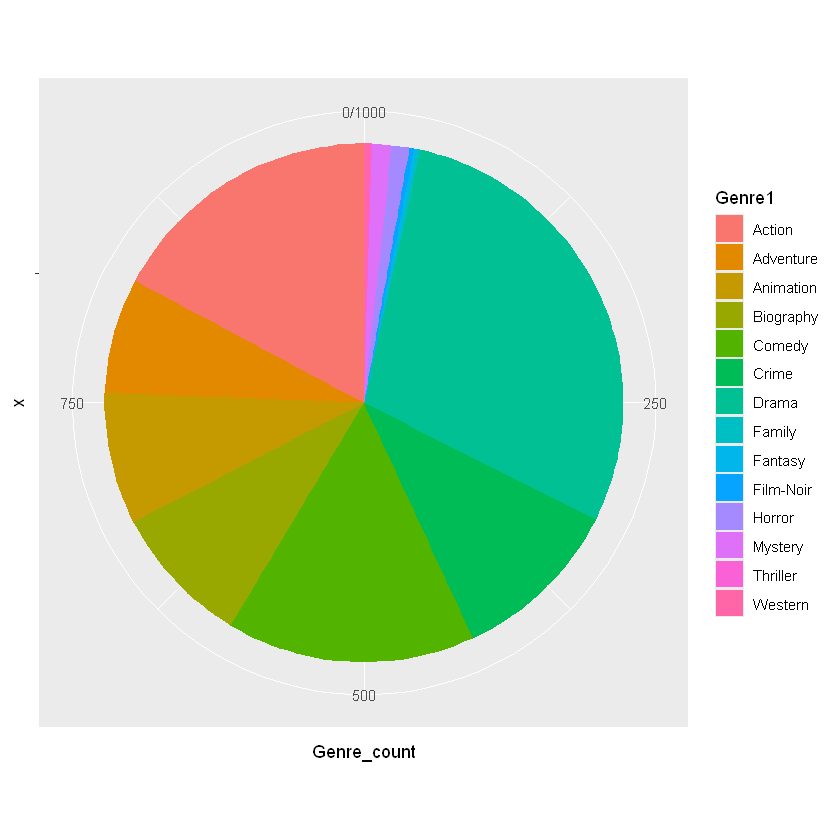

In [7]:
filtered_data %>% 
  count(Genre1,name="Genre_count") %>% 
  ggplot(aes(x="",y=Genre_count,fill=Genre1))+
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)

#### using the facet_grid
This a display of the popularity of creating certain film genre types. Genres such as Action and Science Fiction have seen not only an uptick in the number of films produced, but the gross revenue that they receive in the box office as well. On the other end of the spectrum, Westerns and Musicals have seen a stagnation in films produced and the gross revenue that they receive. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
"Removed 411 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 1951"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 4.035"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 49.491"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"span 

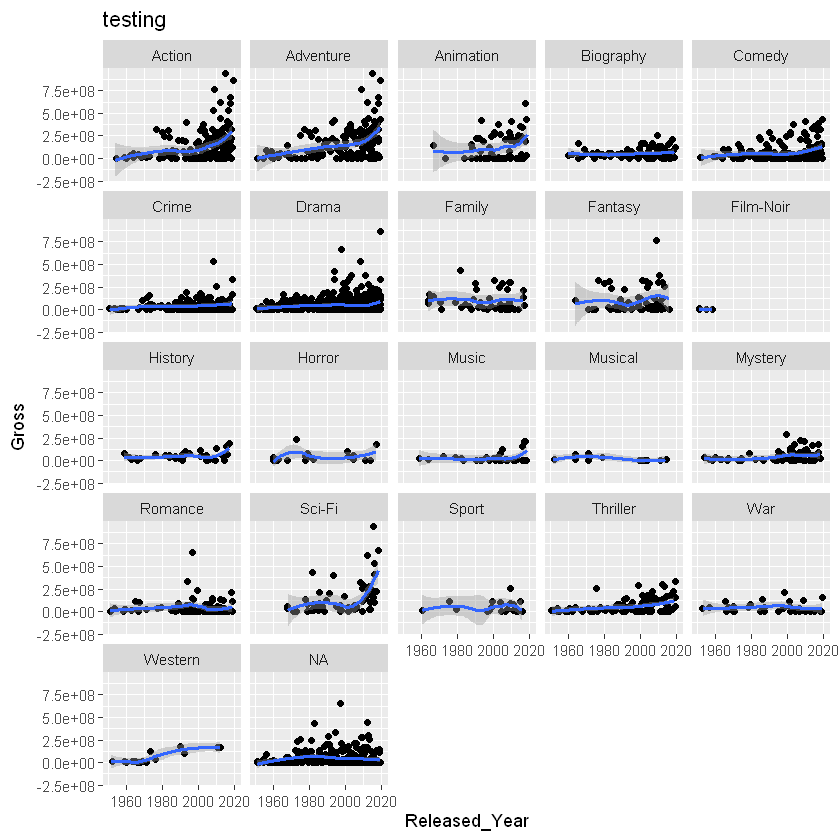

In [8]:
wrap_data<-pivoted_genre_data %>% 
  filter(Released_Year>1950) 
different_genre<-ggplot(wrap_data,aes(x=Released_Year,y=Gross))+geom_jitter()+geom_smooth()+labs(title='testing')
different_genre+facet_wrap(.~Genres)

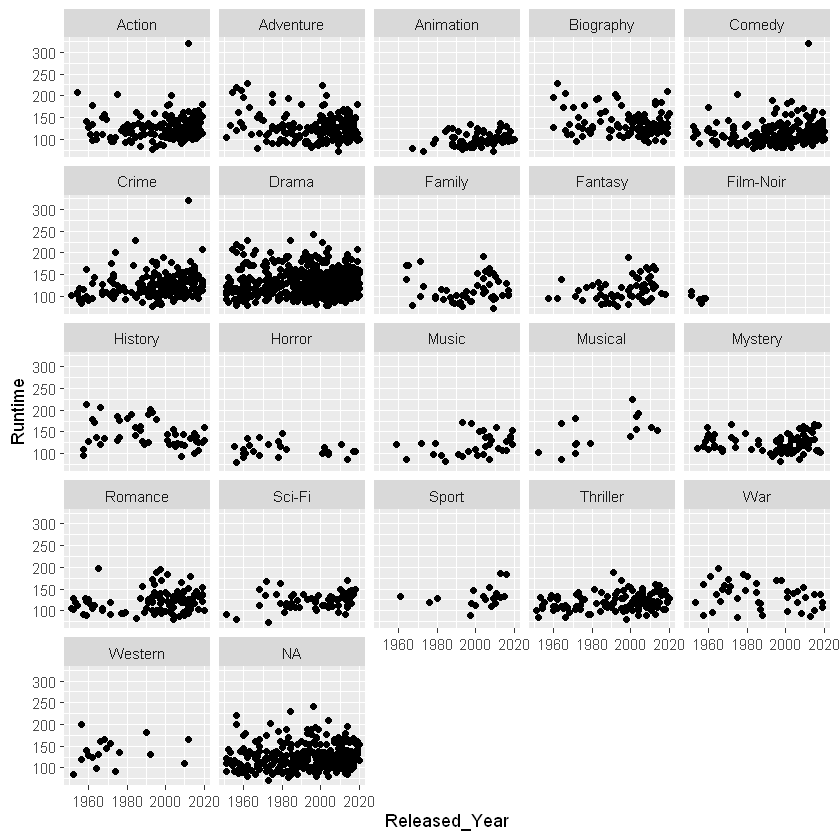

In [9]:
different_genre<-ggplot(wrap_data,aes(x=Released_Year,y=Runtime))+geom_point()
different_genre+facet_wrap(.~Genres)

This is an array of movies released by year, plotted by their runtime in theatres. Despite a few outliers, film runtime tends to remain consistent throughout the decades.

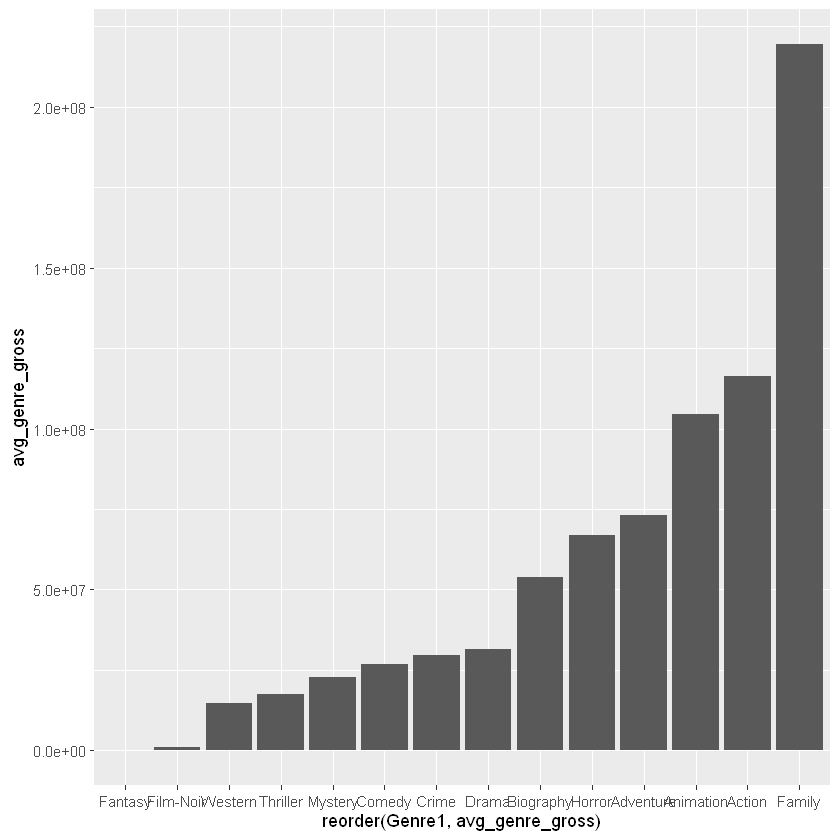

In [10]:
#### average gross per genre
avg_gross <- filtered_data %>% 
             count(Genre1,wt=Gross)
genre_count <- filtered_data %>% 
              count(Genre1,name="Genre_count")
mean_gross_in_genre <- avg_gross %>% 
                       inner_join(genre_count,by="Genre1") %>% 
                       mutate(avg_genre_gross=n/Genre_count)
ggplot(mean_gross_in_genre,aes(x= reorder(Genre1, avg_genre_gross),y=avg_genre_gross)) + 
      geom_bar(stat='identity')

This a bar graph of the average gross revenue per film genre. By far and away the winner here is family films, where the film is extremely accessible to younger children, who’s parents bring them to the theatre. These children translate to extra tickets purchased, resulting in a higher gross revenue at the box office. The second highest gross revenue genre is action, which is usually dominated by movie franchises such as the Marvel Cinematic Universe, which (not counting the latest released movie, “The Eternals”) has raked over a whopping $23 dollars in the box office. Genres such as comedy have seen a recent stagnation over the last years, resulting in fewer movies being released, each with less and less revenue. 

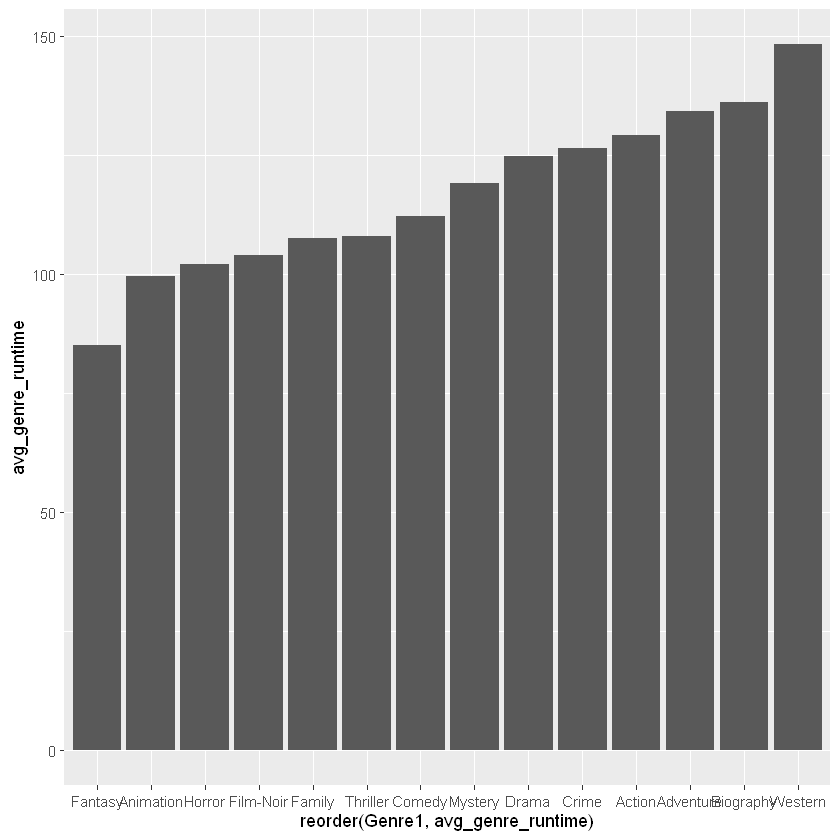

In [11]:
#### average runtime per Genre
combine_runtime <- filtered_data %>% 
             count(Genre1,wt=Runtime)
mean_runtime_in_genre <- combine_runtime %>% 
                       inner_join(genre_count,by="Genre1") %>% 
                       mutate(avg_genre_runtime=n/Genre_count)
ggplot(mean_runtime_in_genre,aes(x= reorder(Genre1,avg_genre_runtime),y=avg_genre_runtime)) + 
      geom_bar(stat='identity')

This is a bar graph of the average runtime of each genre, with Biography and Adventure clocking in at the highest run time. The shortest average run times are found in Fantasy and Animation. This is mostly due to animation being dominated by movies targeted towards young audiences, who don’t possess a long attention span. This results in movies being produced that have short runtimes, in order to appeal to this target demographic. 

In [12]:
#### number of movie in each Genre

total_genres <- 
  pivoted_genre_data %>% 
  count(Genres) %>% 
  arrange(desc(n))
total_genres <- na.omit(total_genres)

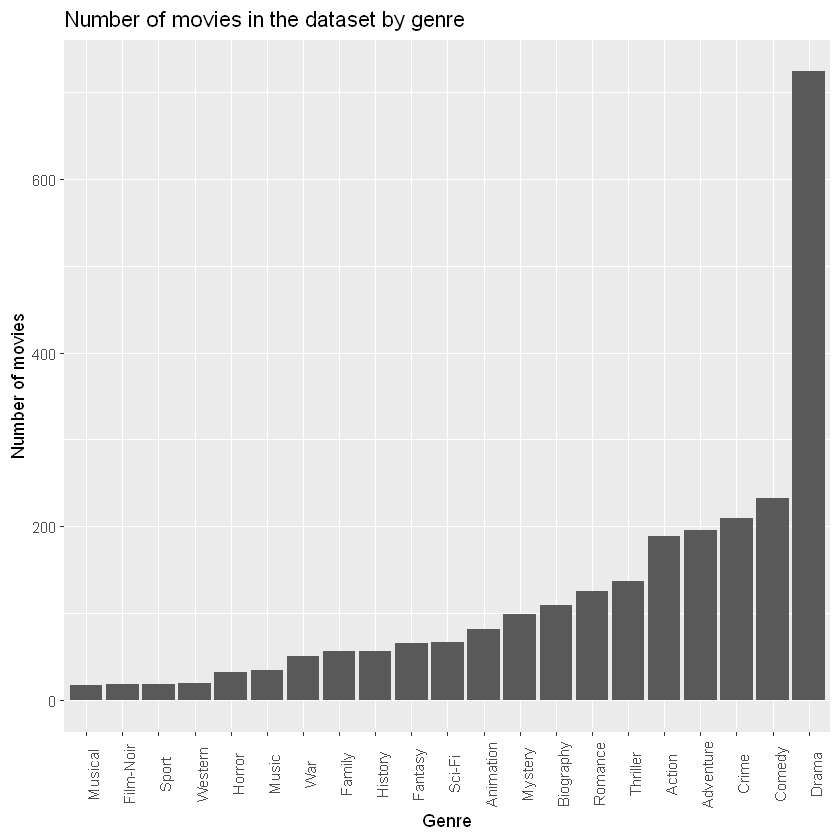

In [13]:
total_genres_bargraph <-
  ggplot(total_genres, aes(x = reorder(Genres, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Genre", y = "Number of movies",
       title = "Number of movies in the dataset by genre")
total_genres_bargraph

#This is a graph showing the number of movies and the description of genre that is contained inside the plot. Most movies on the imdb 1000 contain elements of a Drama genre, followed by that of comedy. It seems that blending these genres together is a popular tactic. 

In [14]:
gross_genres <- 
  filtered_data %>% 
  arrange(desc(Gross)) %>% 
  head(150) %>%
  pivot_longer(c(Genre1, Genre2, Genre3), 
    names_to = "Genre_number", values_to = "Genres") %>% 
  count(Genres) %>% 
  arrange(desc(n)) %>%
  head(13)
gross_genres <- na.omit(gross_genres)

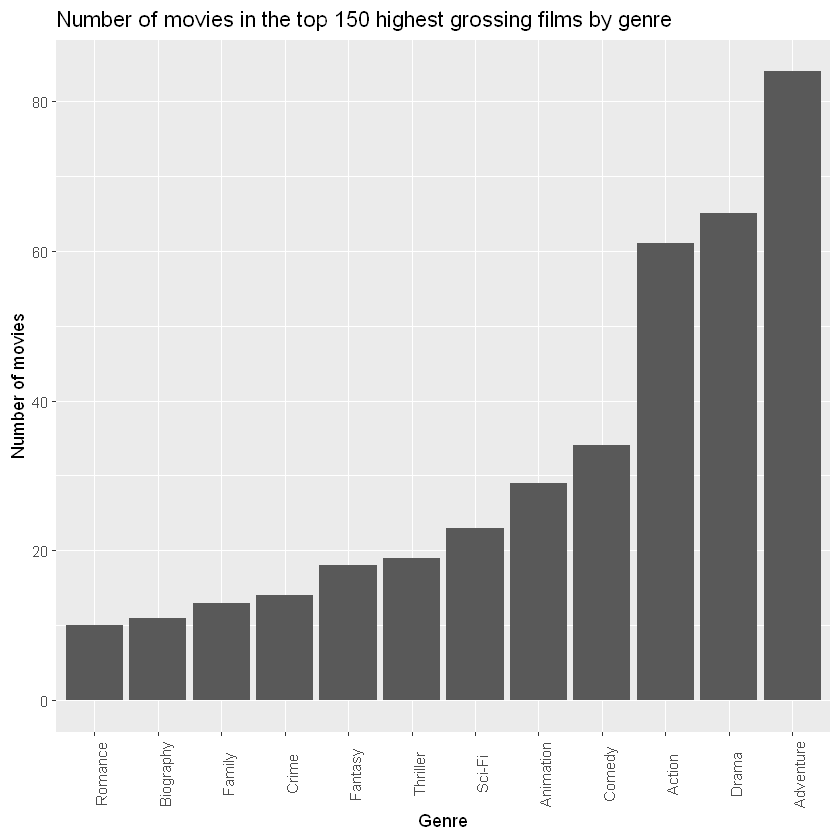

In [15]:
gross_genres_bargraph <- 
  ggplot(gross_genres, aes(x = reorder(Genres, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Genre", y = "Number of movies",
       title = "Number of movies in the top 150 highest grossing films by genre")
gross_genres_bargraph

#This is a bar graph of movies in the top 150 highest grossing, arranged by the amount of films in the genre.

In [16]:
gross_genres_old <- 
  filtered_data %>%
  filter(Released_Year <= 2000) %>% 
  arrange(desc(Gross)) %>% 
  head(150) %>% 
  pivot_longer(c(Genre1, Genre2, Genre3), names_to = "Genre_number", values_to = "Genres") %>%
  count(Genres) %>% 
  arrange(desc(n)) %>% 
  head(12)
gross_genres_old <- na.omit(gross_genres_old)

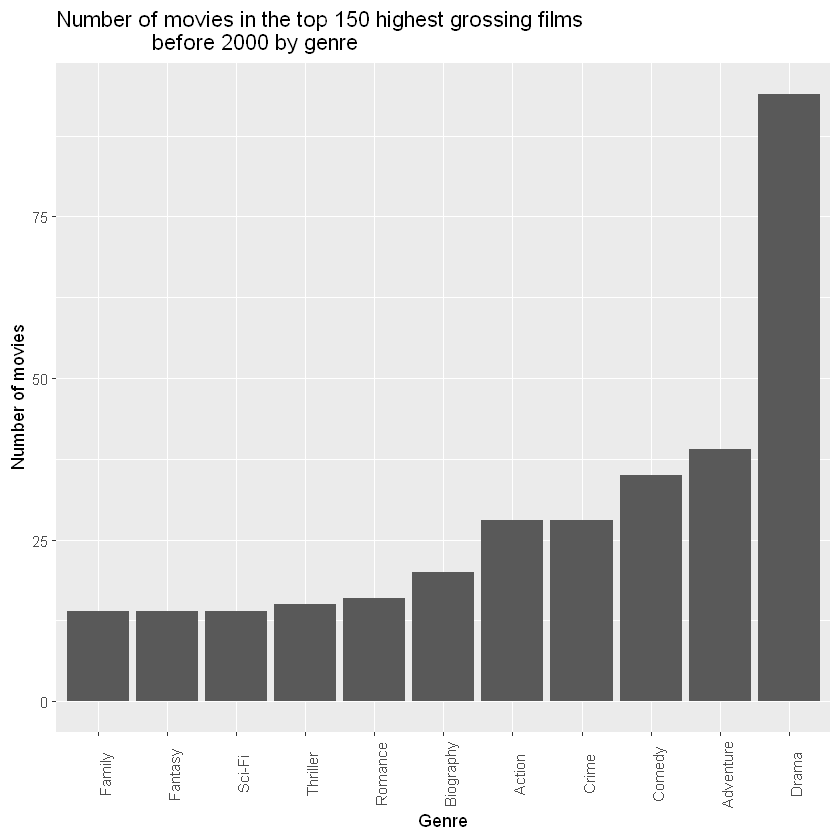

In [17]:
gross_genres_old_bargraph <- 
  ggplot(gross_genres_old, aes(x = reorder(Genres, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Genre", y = "Number of movies",
       title = "Number of movies in the top 150 highest grossing films 
                before 2000 by genre")
gross_genres_old_bargraph

#This graph shows the 150 highest grossing films released before 2000, arranged by the quantity. It is interesting to note the high amount of Drama movies and their popularity before the turn of the century. Movies such as “Gone with the Wind” reign supreme here, as it was the blockbuster hit in the early 20th century.

In [18]:
metascore_genres <- 
  filtered_data %>% 
  arrange(desc(Meta_score)) %>% 
  head(150) %>%
  pivot_longer(c(Genre1, Genre2, Genre3), 
    names_to = "Genre_number", values_to = "Genres") %>% 
  count(Genres) %>% 
  arrange(desc(n)) %>%
  head(13)
metascore_genres <- na.omit(metascore_genres)

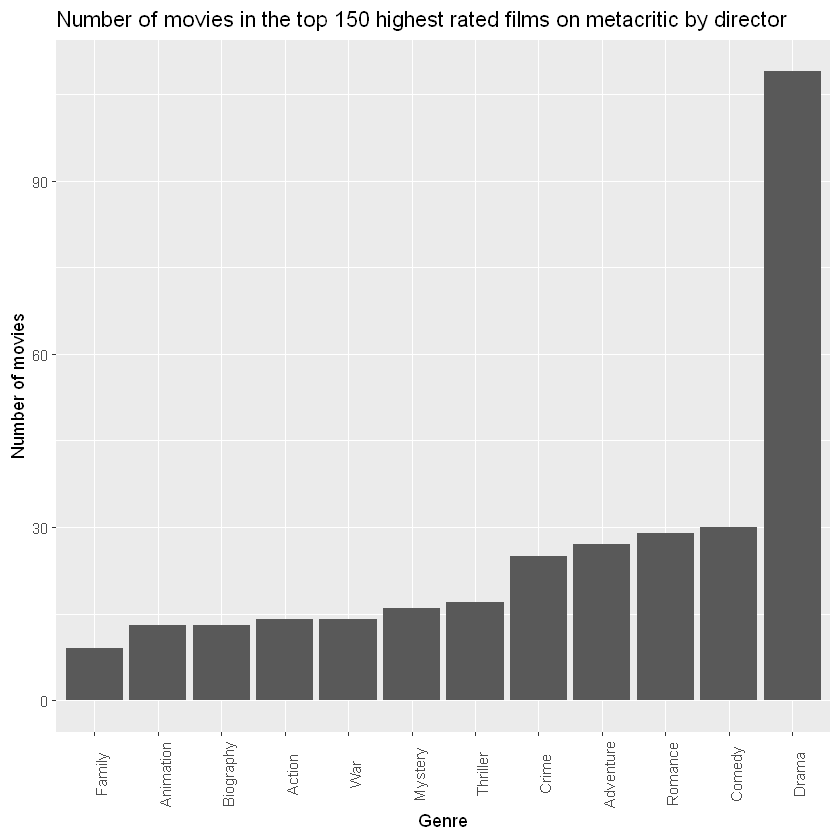

In [19]:
metascore_genres_bargraph <- 
  ggplot(metascore_genres, aes(x = reorder(Genres, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Genre", y = "Number of movies",
       title = "Number of movies in the top 150 highest rated films on metacritic by director")
metascore_genres_bargraph

In [20]:
imdb_genres <- 
  filtered_data %>% 
  arrange(desc(IMDB_Rating)) %>% 
  head(150) %>%
  pivot_longer(c(Genre1, Genre2, Genre3), 
    names_to = "Genre_number", values_to = "Genres") %>% 
  count(Genres) %>% 
  arrange(desc(n)) %>%
  head(13)
imdb_genres <- na.omit(imdb_genres)

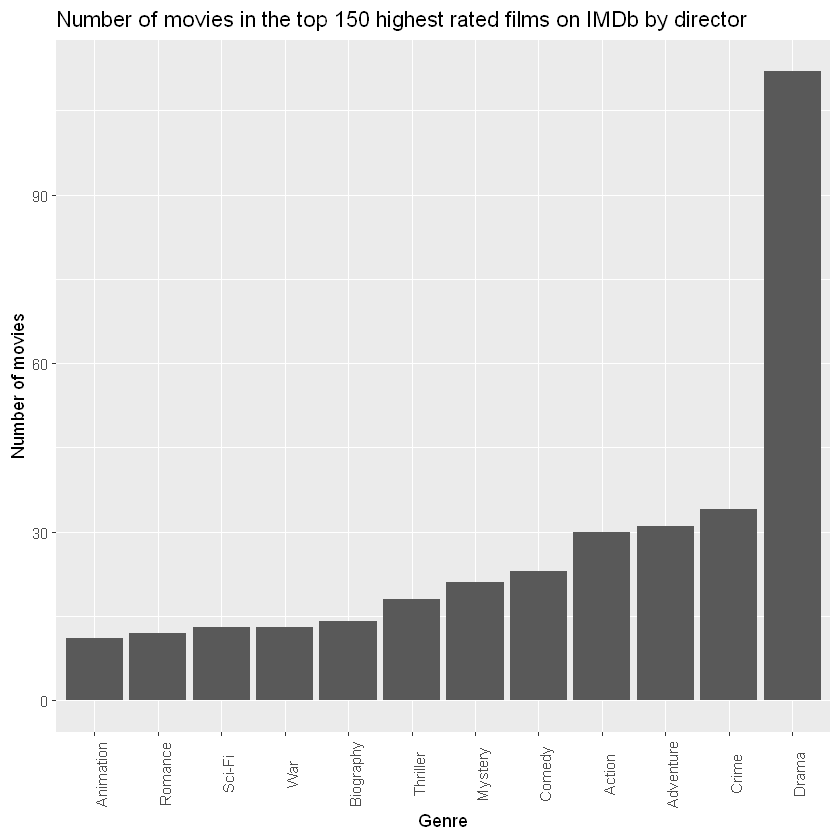

In [21]:
imdb_genres_bargraph <- 
  ggplot(imdb_genres, aes(x = reorder(Genres, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Genre", y = "Number of movies",
       title = "Number of movies in the top 150 highest rated films on IMDb by director")
imdb_genres_bargraph

# 2.2 Actor

In [22]:

#Pivot actors into one column
pivoted_actor_data <- 
  filtered_data %>% 
  pivot_longer(c(Star1, Star2, Star3, Star4), names_to = "Star_number", values_to = "Stars")
star_coount<-pivoted_actor_data %>% 
             count(Stars)

In [23]:
total_actors <-
  pivoted_actor_data %>% 
  count(Stars) %>% 
  arrange(desc(n)) %>% 
  head(30)
pivoted_actor_data %>% 
  group_by(Stars) %>% 
  summarise(count = n(), total_gross = sum(Gross, na.rm = TRUE)) %>% 
  arrange(desc(count)) %>% 
  head(30)

Stars,count,total_gross
<chr>,<int>,<dbl>
Robert De Niro,17,1001666213
Tom Hanks,14,2903564984
Al Pacino,13,641212389
Brad Pitt,12,1050232638
Clint Eastwood,12,568940004
Christian Bale,11,1616439385
Leonardo DiCaprio,11,2049297400
Matt Damon,11,1728541599
James Stewart,10,61667613


Due to the fact that the data set has three actor categories, we used pivot long command to collapse it into one column, allowing for this is a summarized list of starring actors in IMDB top 1000. Here we see household names such as Robert De Niro, Tom Hanks, and Al Pacino. Alongside the number of films that they have starred in, we see their total gross revenue for all their films. Actors that appear in movie franchises like Scarlett Johansson as Black Widow in the Marvel Cinematic Universe, have a huge gross revenue attributed to their films, despite the fact that most moviegoers do not go to theatres to see her specifically. Additionally, it is important to note film count does not always correlate with gross revenue, as we see that Robert Downey Jr. only appears in 7 films of the top 1000, his gross revenue is almost 51x times higher than James Stewart, despite the fact that James has acted in 3 more movies than him on this list.

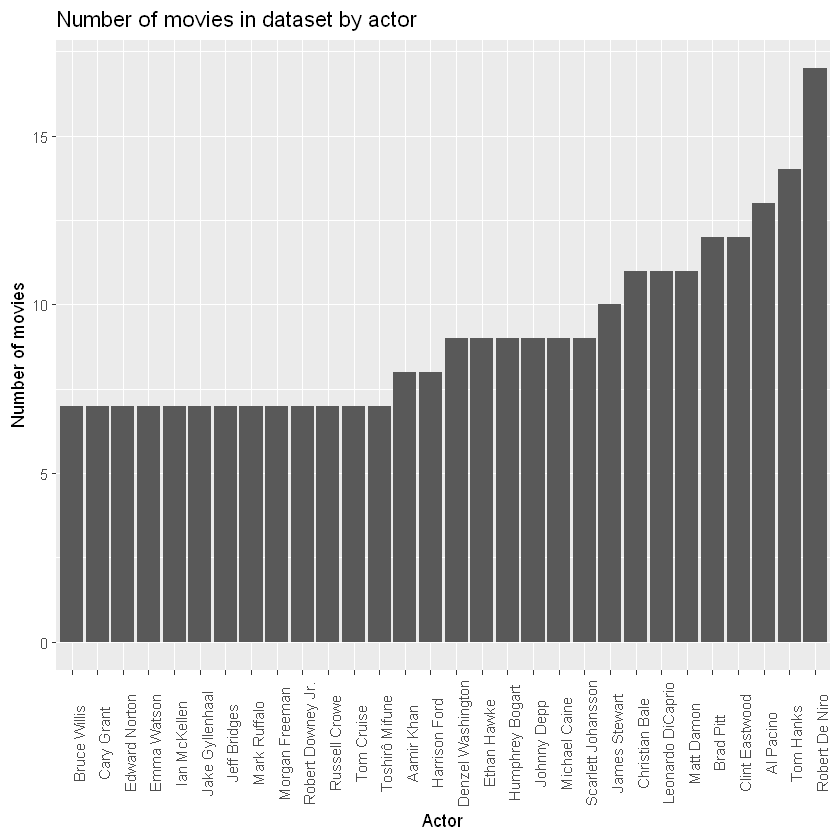

In [24]:
total_actors_bargraph <-
  ggplot(total_actors, aes(x = reorder(Stars, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Actor", y = "Number of movies",
       title = "Number of movies in dataset by actor")
total_actors_bargraph

#This is a simple bar graph of the amount of movies that actors appeared in on the top 1000 IMDB list. It is simpler to compare the number of movies actor to actor with a bar graph like this. 

In [25]:
gross_actors <- 
  filtered_data %>% 
  arrange(desc(Gross)) %>% 
  head(150) %>%
  pivot_longer(c(Star1, Star2, Star3, Star4), 
    names_to = "Star_number", values_to = "Stars") %>% 
  count(Stars) %>% 
  arrange(desc(n)) %>% 
  filter(n >= 4)
gross_actors <- subset(gross_actors, Stars != "Joe Russo")

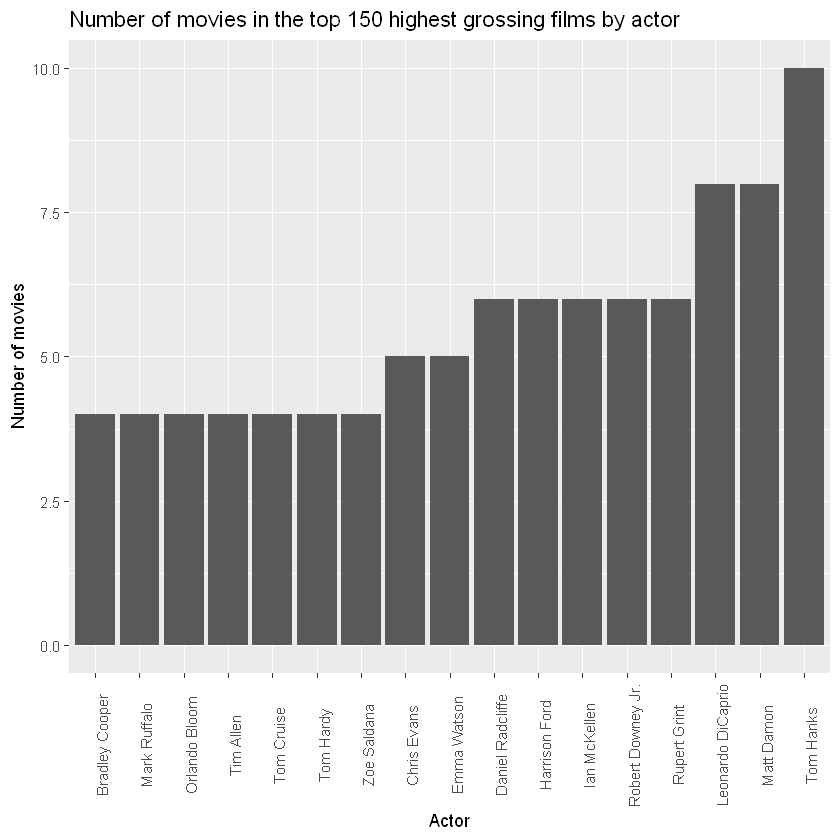

In [26]:
gross_actors_bargraph <- 
  ggplot(gross_actors, aes(x = reorder(Stars, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Actor", y = "Number of movies",
       title = "Number of movies in the top 150 highest grossing films by actor")
gross_actors_bargraph

This chart is interesting, as it shows which films actors starred in the top 150 highest grossing movies. While correlation doesn't equal causation, it is important to note that Hollywood staples such as Tom Hanks, Matt Damon, and Leonardo DiCaprio, lead the charge in box office generating revenue. 

In [27]:
gross_actors_with_movies <-
  filtered_data %>%
  arrange(desc(Gross)) %>% 
  head(150) %>%
  pivot_longer(c(Star1, Star2, Star3, Star4), 
    names_to = "Star_number", values_to = "Stars") %>%
  select(Stars, Series_Title, Gross) %>% 
  filter(Stars %in% gross_actors$Stars) %>% 
  arrange(match(Stars, gross_actors$Stars))
gross_actors_with_movies

Stars,Series_Title,Gross
<chr>,<chr>,<dbl>
Tom Hanks,Toy Story 4,434038008
Tom Hanks,Toy Story 3,415004880
Tom Hanks,Forrest Gump,330252182
Tom Hanks,Toy Story 2,245852179
Tom Hanks,Cast Away,233632142
Tom Hanks,Saving Private Ryan,216540909
Tom Hanks,Toy Story,191796233
Tom Hanks,Apollo 13,173837933
Tom Hanks,Catch Me If You Can,164615351


In [28]:
#Here is the same thing but in list form. 
gross_actors_old <- 
  filtered_data %>%
  filter(Released_Year <= 2000) %>% 
  arrange(desc(Gross)) %>% 
  head(150) %>% 
  pivot_longer(c(Star1, Star2, Star3, Star4), 
    names_to = "Star_number", values_to = "Stars") %>% 
  count(Stars) %>% 
  arrange(desc(n)) %>% 
  filter(n >= 4)

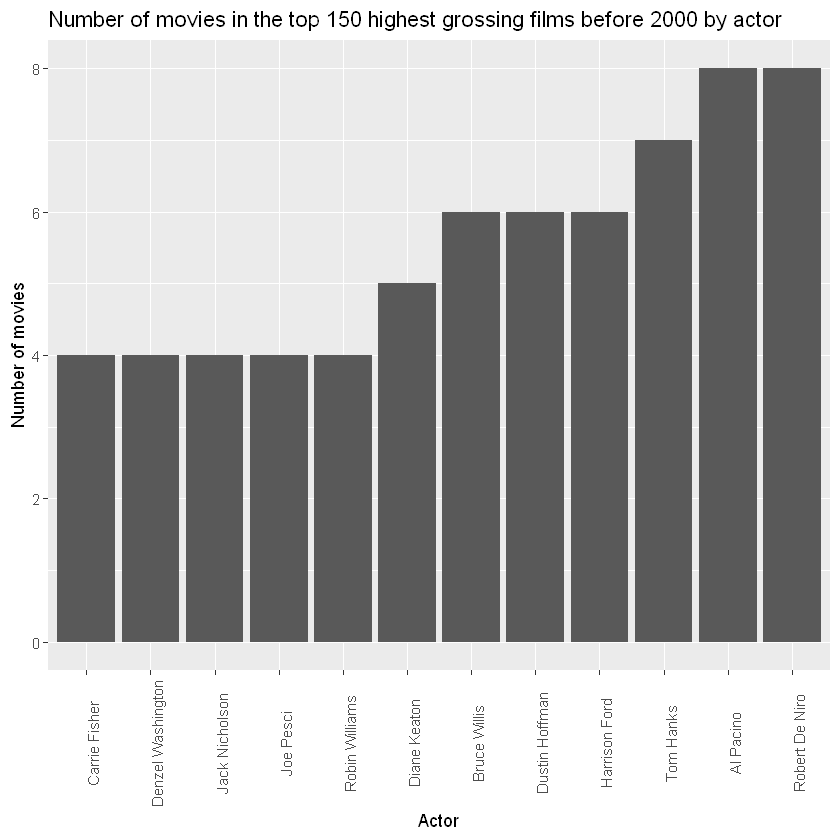

In [29]:
gross_actors_old_bargraph <- 
  ggplot(gross_actors_old, aes(x = reorder(Stars, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Actor", y = "Number of movies",
       title = "Number of movies in the top 150 highest grossing films before 2000 by actor")
gross_actors_old_bargraph

This is the same chart idea as above, however, it is limited to movies released before the turn of the century. We are able to see that the highest grossing movie’s actors change, with Robert De Niro and Al Pacino taking the lead. 

In [30]:
metascore_actors <- 
  filtered_data %>%
  arrange(desc(Meta_score)) %>% 
  head(150) %>%
  pivot_longer(c(Star1, Star2, Star3, Star4), 
    names_to = "Star_number", values_to = "Stars") %>%
  count(Stars) %>% 
  arrange(desc(n)) %>% 
  filter(n >= 3)

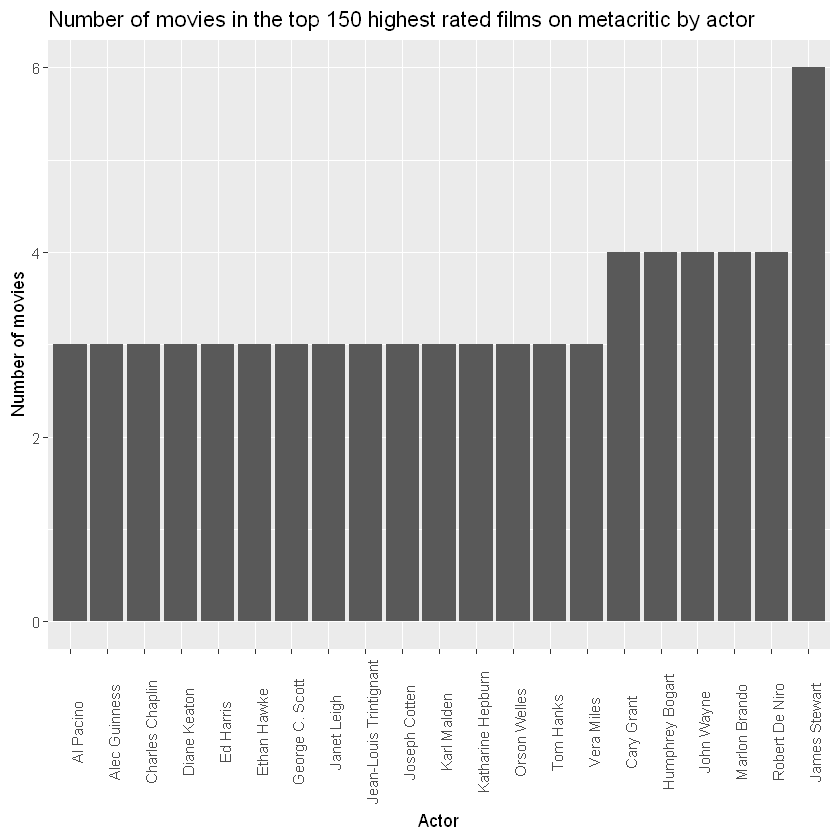

In [31]:
metascore_actors_bargraph <- 
  ggplot(metascore_actors, aes(x = reorder(Stars, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Actor", y = "Number of movies" , 
       title = "Number of movies in the top 150 highest rated films on metacritic by actor")
metascore_actors_bargraph

Here is a bar graph of the highest rated movies on metacritic with actors and their total movies listed. We see some familiar faces, such as James Stewart and Robert De Niro. 

In [32]:
metascore_actors_with_movies <-
  filtered_data %>%
  arrange(desc(Meta_score)) %>% 
  head(150) %>%
  pivot_longer(c(Star1, Star2, Star3, Star4), 
    names_to = "Star_number", values_to = "Stars") %>%
  select(Stars, Series_Title, Meta_score) %>% 
  filter(Stars %in% metascore_actors$Stars) %>% 
  arrange(match(Stars, metascore_actors$Stars))
metascore_actors_with_movies

Stars,Series_Title,Meta_score
<chr>,<chr>,<dbl>
James Stewart,Rear Window,100
James Stewart,Vertigo,100
James Stewart,The Shop Around the Corner,96
James Stewart,The Philadelphia Story,96
James Stewart,Anatomy of a Murder,95
James Stewart,The Man Who Shot Liberty Valance,94
Cary Grant,Notorious,100
Cary Grant,North by Northwest,98
Cary Grant,The Philadelphia Story,96


In [33]:
imdb_actors <- 
  filtered_data %>%
  arrange(desc(IMDB_Rating)) %>% 
  head(150) %>% 
  pivot_longer(c(Star1, Star2, Star3, Star4), 
    names_to = "Star_number", values_to = "Stars") %>%
  count(Stars) %>% 
  arrange(desc(n)) %>% 
  filter(n >= 3)

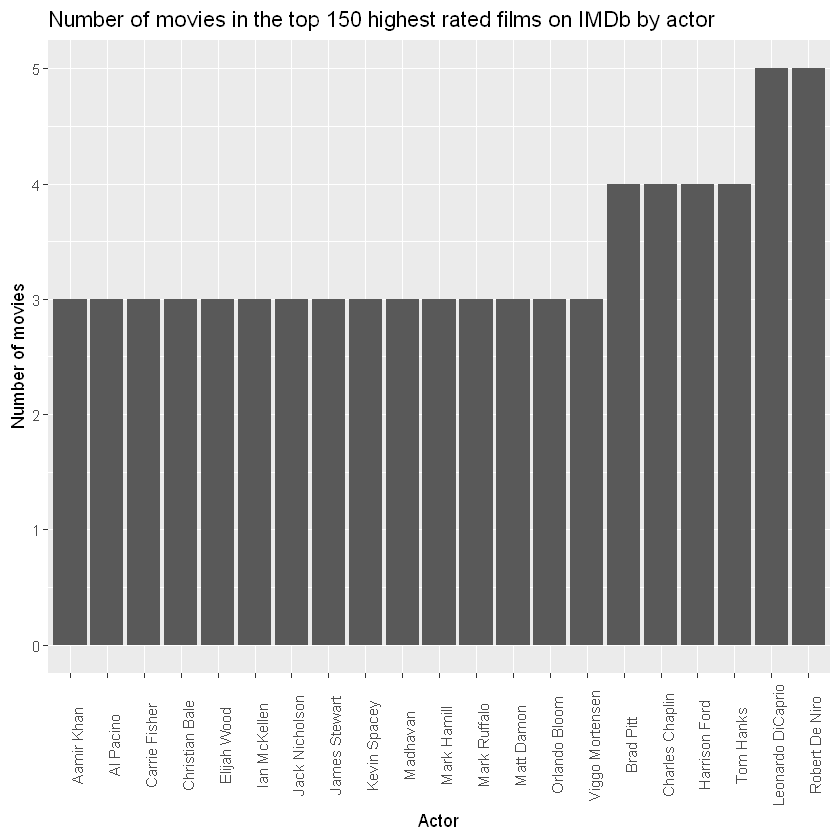

In [34]:
imdb_actors_bargraph <- 
  ggplot(imdb_actors, aes(x = reorder(Stars, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90))  +
  labs(x = "Actor", y = "Number of movies",
       title = "Number of movies in the top 150 highest rated films on IMDb by actor")
imdb_actors_bargraph

This graph shows the same idea as the one above, but instead of metacritic score, it is ranked by IMDB score. Again we see some familiar names, such as Robert De Niro and Leonardo DiCaprio. 

In [35]:
imdb_actors_with_movies <-
  filtered_data %>%
  arrange(desc(IMDB_Rating)) %>% 
  head(150) %>%
  pivot_longer(c(Star1, Star2, Star3, Star4), 
  names_to = "Star_number", values_to = "Stars") %>%
  select(Stars, Series_Title, IMDB_Rating) %>% 
  filter(Stars %in% imdb_actors$Stars) %>% 
  arrange(match(Stars, imdb_actors$Stars))
imdb_actors_with_movies

Stars,Series_Title,IMDB_Rating
<chr>,<chr>,<dbl>
Leonardo DiCaprio,Inception,8.8
Leonardo DiCaprio,The Departed,8.5
Leonardo DiCaprio,Django Unchained,8.4
Leonardo DiCaprio,Shutter Island,8.2
Leonardo DiCaprio,The Wolf of Wall Street,8.2
Robert De Niro,The Godfather: Part II,9.0
Robert De Niro,Goodfellas,8.7
Robert De Niro,Joker,8.5
Robert De Niro,Once Upon a Time in America,8.4


# 2.3 Director

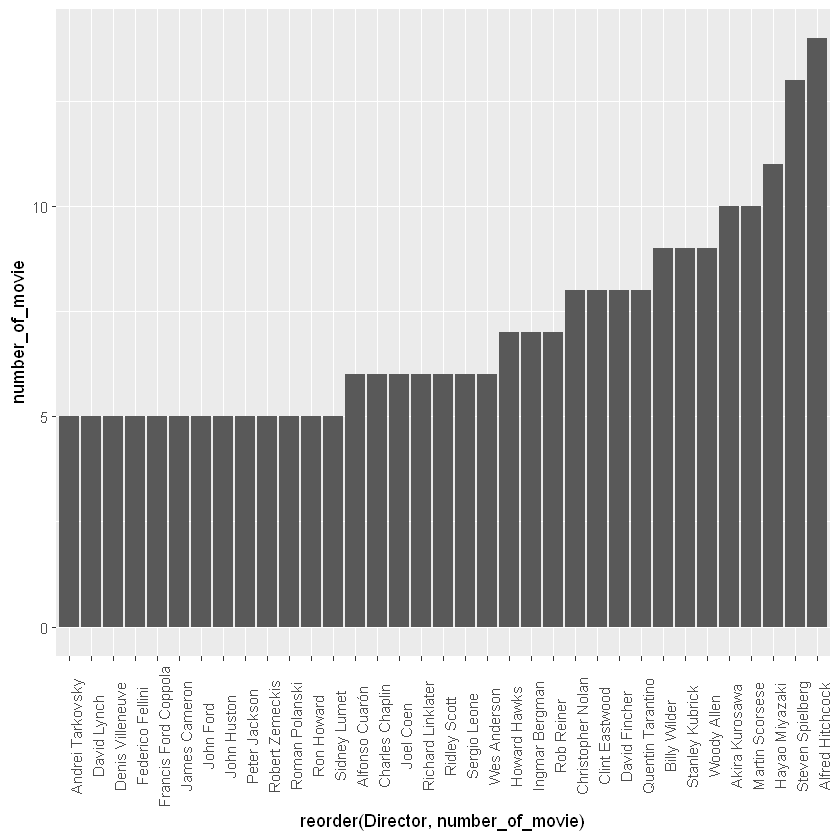

In [36]:
dir<-filtered_data %>% 
     count(Director) %>%
     rename(number_of_movie=n) %>% 
     filter(number_of_movie>=5)

ggplot(dir,aes(x=reorder(Director,number_of_movie),y=number_of_movie))+
  geom_bar(stat='identity')+
  theme(axis.text.x = element_text(angle = 90))

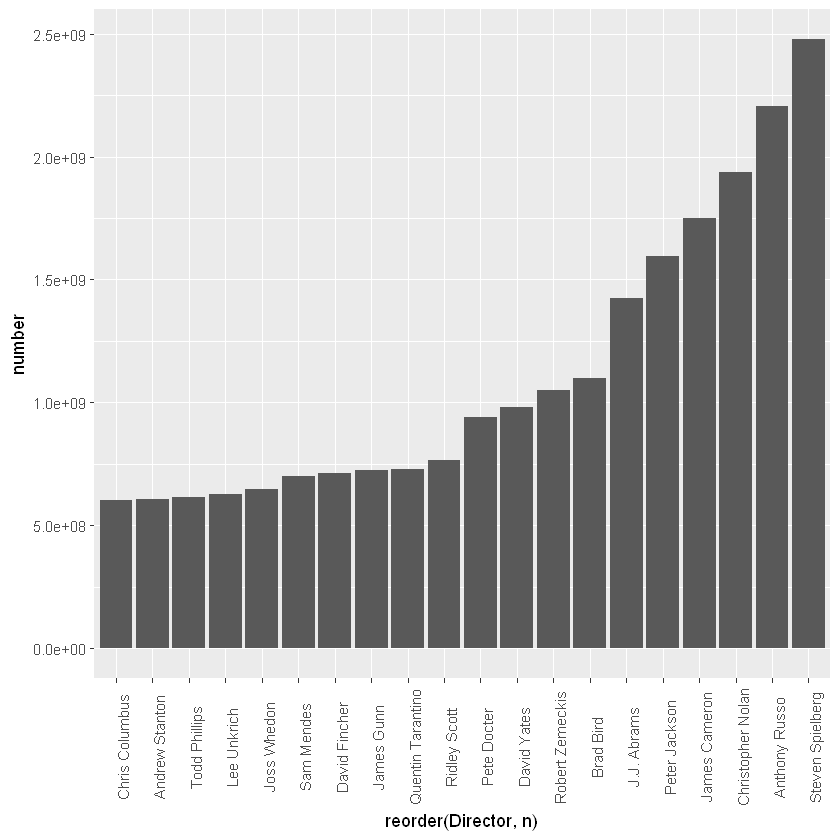

In [37]:
#Here is a bar graph of the directors with the most films in the top 1000 ranked by IMDB. We see industry titans such as Alfred Hitchcock and Steven Spielberg rank at the very top of this list, each with over ten films of theirs appearing in the top 1000 movies. 
geco<-filtered_data %>% 
      count(Director,wt=Gross) %>% 
      filter(n>=600000000)

ggplot(geco,aes(x=reorder(Director,n),y=n))+
  geom_bar(stat='identity')+
  theme(axis.text.x = element_text(angle = 90))+
  labs(y="number")

This bar graph shows the highest grossing directors in the top 1000 IMDB ranked movies. To no one’s surprise, the director of so many blockbuster movies such as Jaws and ET, shows up as the leader of the box office generation. Next to Steven Spielberg, the Russo Brothers (Here just listed as Anthony Russo), the directors of the Marvel Cinematic Universe, are the second highest grossing directors in this data set. This is a great graph to show which directors are known for directing blockbuster hits that get people going to the theatre. Also interesting to see that despite directing the highest grossing movie of all time in Avatar, James Cameron is only 4th on this list.  

In [38]:
total_directors <-
  filtered_data %>% 
  count(Director) %>% 
  arrange(desc(n)) %>% 
  head(30)

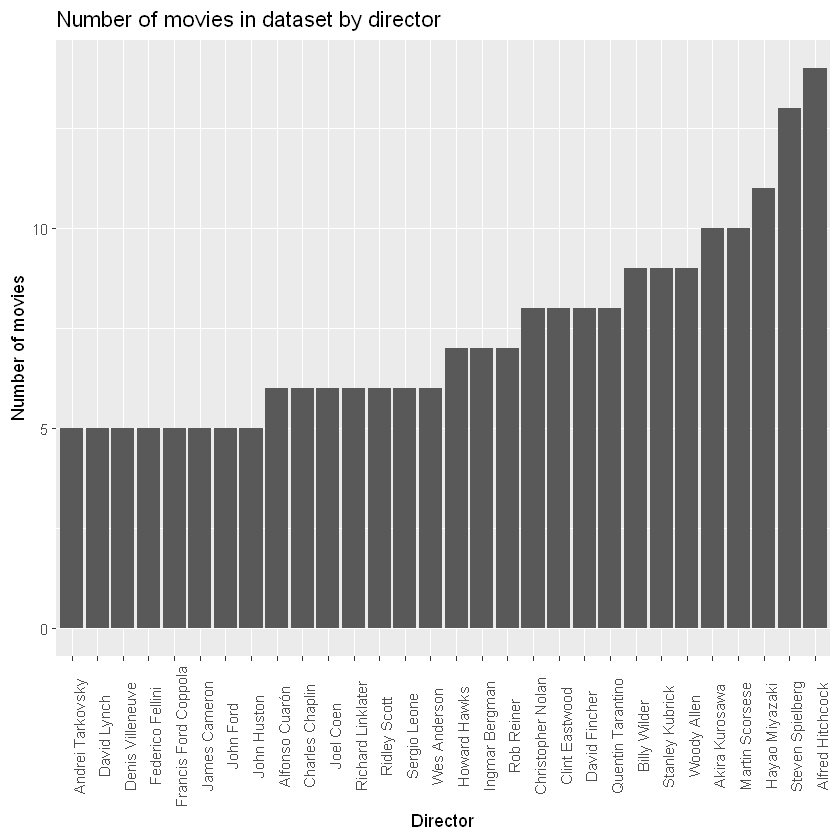

In [39]:
total_directors_bargraph <-
  ggplot(total_directors, aes(x = reorder(Director, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Director", y = "Number of movies",
       title = "Number of movies in dataset by director")
total_directors_bargraph

This is a simple bar graph to simply show the quantity of movies that these directors have created. Again, industry staples like Steven and Alfred dominate the chart.

In [40]:
gross_directors <- 
  filtered_data %>%
  arrange(desc(Gross)) %>% 
  head(150) %>% 
  count(Director) %>% 
  arrange(desc(n)) %>% 
  filter(n >= 3)

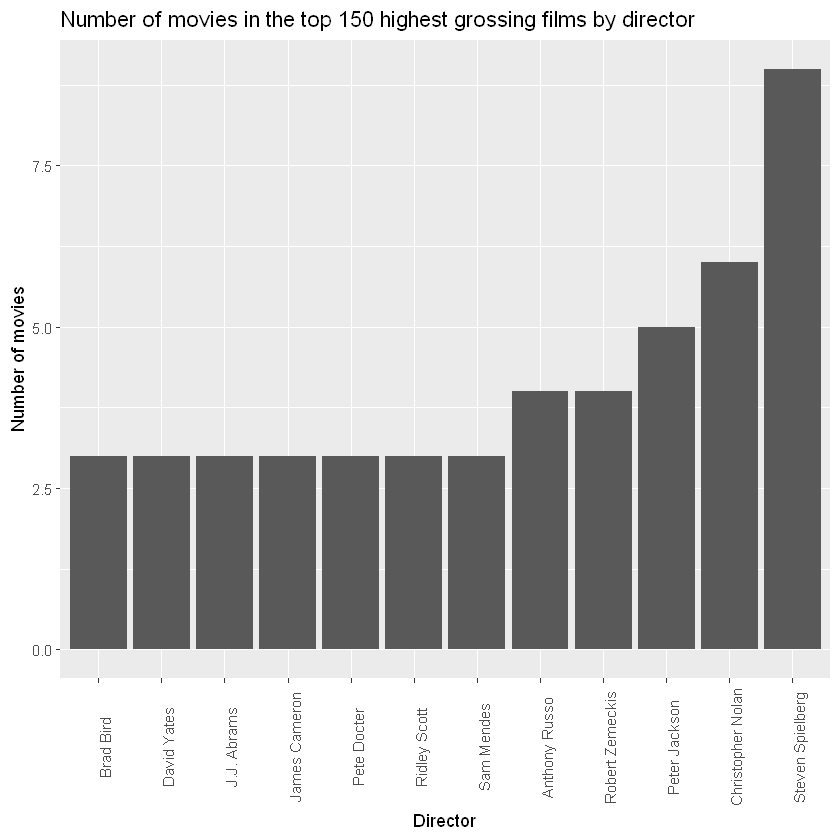

In [41]:
gross_directors_bargraph <- 
  ggplot(gross_directors, aes(x = reorder(Director, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Director", y = "Number of movies",
       title = "Number of movies in the top 150 highest grossing films by director")
gross_directors_bargraph

This graph displays the top 150 highest grossing movies in the data set, and which directors have created the most amount. Obviously we have the BlockBuster King in Spielberg leading the charge, but more contemporary directors such as Nolan (known for movies such has Inception and Interstellar) and Jackson (Lord of the Rings film) are close behind.  

In [42]:
gross_directors_with_movies <-
  filtered_data %>%
  arrange(desc(Gross)) %>% 
  head(150) %>%
  select(Director, Series_Title, Gross) %>% 
  filter(Director %in% gross_directors$Director) %>% 
  arrange(match(Director, gross_directors$Director))
gross_directors_with_movies

Director,Series_Title,Gross
<chr>,<chr>,<dbl>
Steven Spielberg,E.T. the Extra-Terrestrial,435110554
Steven Spielberg,Jurassic Park,402453882
Steven Spielberg,Jaws,260000000
Steven Spielberg,Raiders of the Lost Ark,248159971
Steven Spielberg,Saving Private Ryan,216540909
Steven Spielberg,Indiana Jones and the Last Crusade,197171806
Steven Spielberg,Catch Me If You Can,164615351
Steven Spielberg,Close Encounters of the Third Kind,132088635
Steven Spielberg,Minority Report,132072926


In [43]:
gross_directors_old <- 
  filtered_data %>%
  filter(Released_Year <= 2000) %>% 
  arrange(desc(Gross)) %>% 
  head(150) %>% 
  count(Director) %>% 
  arrange(desc(n)) %>% 
  filter(n >= 3)

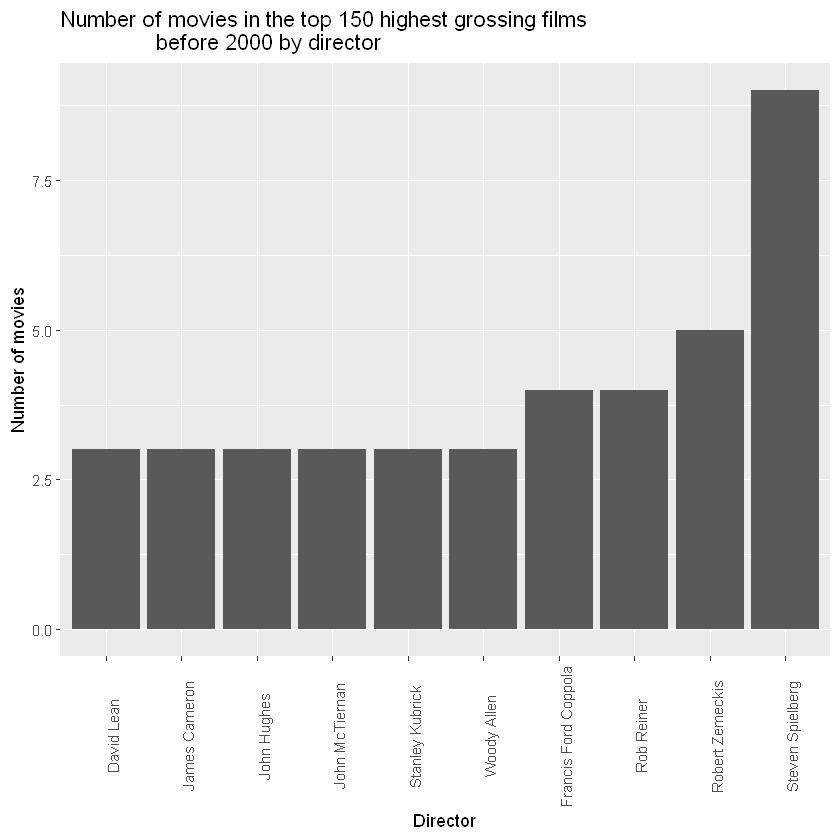

In [44]:
gross_directors_old_bargraph <- 
  ggplot(gross_directors_old, aes(x = reorder(Director, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Director", y = "Number of movies",
       title = "Number of movies in the top 150 highest grossing films 
                before 2000 by director")
gross_directors_old_bargraph

This is the same idea as the lists above, however we capped it to movies released before the turn of the century. Steven Speilgberg reigns supreme here again once more, but his competition has changed. 

In [45]:
metascore_directors <- 
  filtered_data %>%
  arrange(desc(Meta_score)) %>% 
  head(150) %>%
  count(Director) %>% 
  arrange(desc(n)) %>% 
  filter(n >= 3)

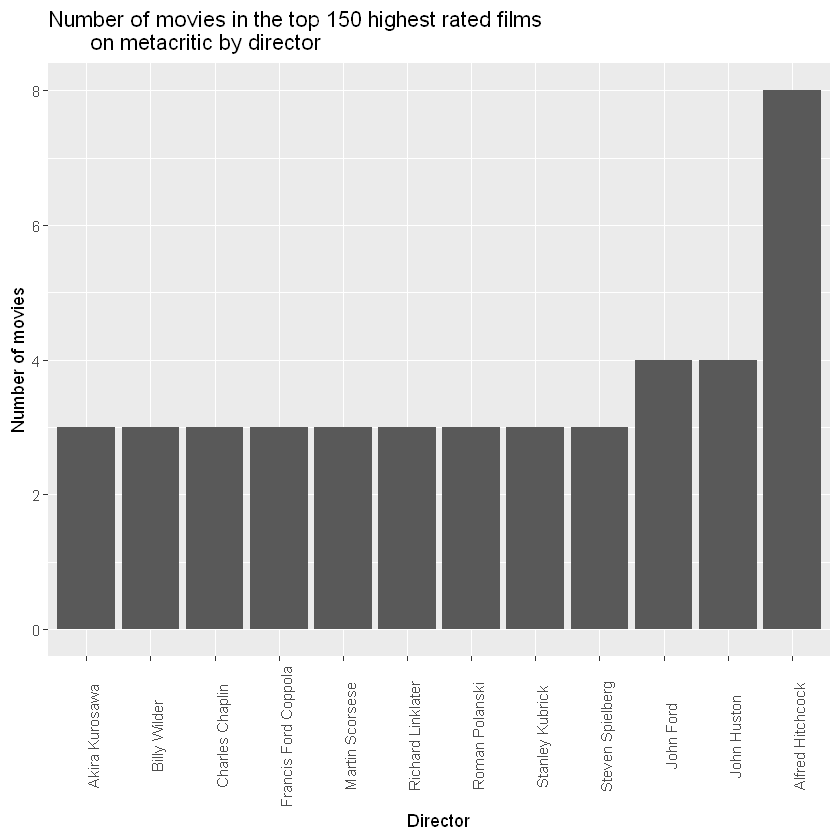

In [46]:
metascore_directors_bargraph <- 
  ggplot(metascore_directors, aes(x = reorder(Director, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Director", y = "Number of movies",
       title = "Number of movies in the top 150 highest rated films
       on metacritic by director")
metascore_directors_bargraph


This bar graph shows the directors that have the most films in the top 150 of metacritic score in this data set. It looks as if metacritic really appreciates Alfred Hitchcock, as he leads the charge with a whopping 8 movies in the top 150. Interesting, Steven Speilgberg is not listed and is out competed by other directors. 

In [47]:
metascore_directors_with_movies <-
  filtered_data %>%
  arrange(desc(Meta_score)) %>% 
  head(150) %>%
  select(Director, Series_Title, Meta_score) %>% 
  filter(Director %in% metascore_directors$Director) %>% 
  arrange(match(Director, metascore_directors$Director))
metascore_directors_with_movies

Director,Series_Title,Meta_score
<chr>,<chr>,<dbl>
Alfred Hitchcock,Rear Window,100
Alfred Hitchcock,Vertigo,100
Alfred Hitchcock,Notorious,100
Alfred Hitchcock,North by Northwest,98
Alfred Hitchcock,The Lady Vanishes,98
Alfred Hitchcock,Psycho,97
Alfred Hitchcock,Shadow of a Doubt,94
Alfred Hitchcock,The 39 Steps,93
John Ford,The Grapes of Wrath,96


In [48]:
imdb_directors <- 
  filtered_data %>%
  arrange(desc(IMDB_Rating)) %>% 
  head(150) %>% 
  count(Director) %>% 
  arrange(desc(n)) %>% 
  filter(n >= 3)

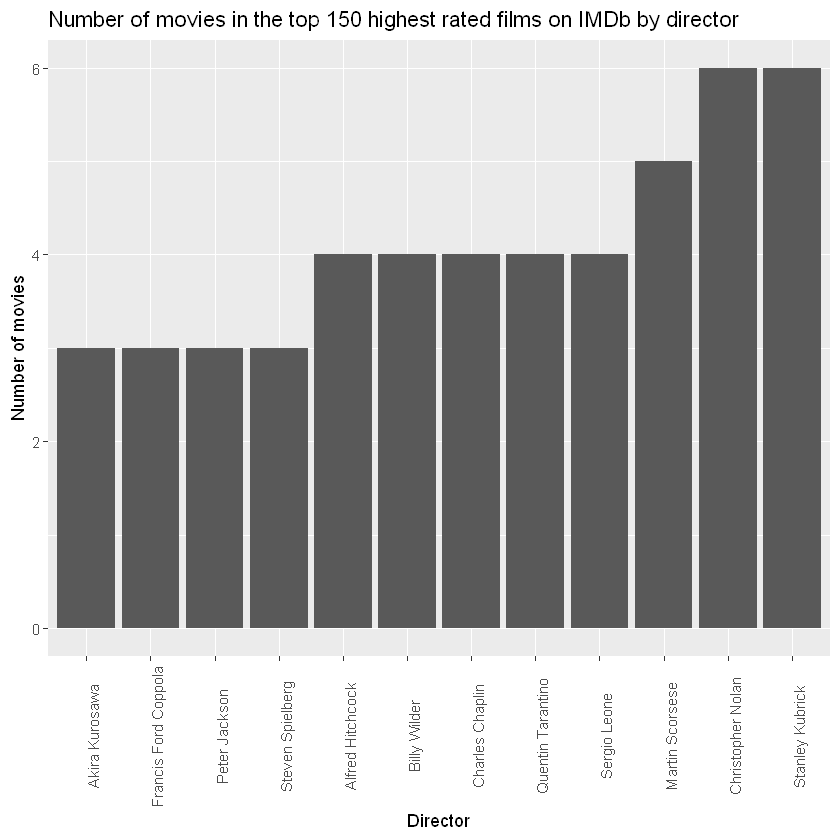

In [49]:
imdb_directors_bargraph <- 
  ggplot(imdb_directors, aes(x = reorder(Director, n), n)) + 
  geom_bar(stat = 'identity') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x = "Director", y = "Number of movies", 
      title = "Number of movies in the top 150 highest rated films on IMDb by director")
imdb_directors_bargraph

This is the same idea of the graph listed above, however, this one runs of purely IMDB score for the top 150 films. Here we see that instead of Alfred Hitchcock, we have Kubrick and Nolan running the show. 

In [50]:
imdb_directors_with_movies <-
  filtered_data %>%
  arrange(desc(IMDB_Rating)) %>% 
  head(150) %>%
  select(Director, Series_Title, IMDB_Rating) %>% 
  filter(Director %in% imdb_directors$Director) %>% 
  arrange(match(Director, imdb_directors$Director))
imdb_directors_with_movies

Director,Series_Title,IMDB_Rating
<chr>,<chr>,<dbl>
Christopher Nolan,The Dark Knight,9.0
Christopher Nolan,Inception,8.8
Christopher Nolan,Interstellar,8.6
Christopher Nolan,The Prestige,8.5
Christopher Nolan,The Dark Knight Rises,8.4
Christopher Nolan,Memento,8.4
Stanley Kubrick,The Shining,8.4
Stanley Kubrick,Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb,8.4
Stanley Kubrick,Paths of Glory,8.4


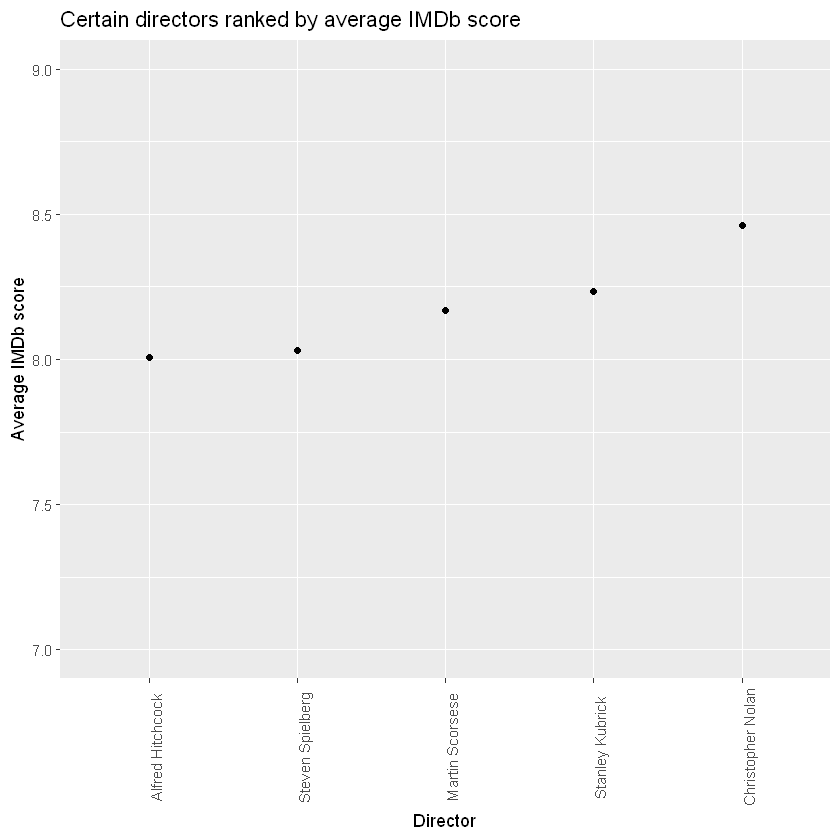

In [51]:
avg_imdb_director_scatter <-
  filtered_data %>%
  filter(Director == "Alfred Hitchcock" | 
           Director == "Christopher Nolan" | 
           Director == "Stanley Kubrick" | 
           Director == "Steven Spielberg" | 
           Director == "Martin Scorsese") %>% 
  group_by(Director) %>% 
  summarize(avg_imdb_score = mean(IMDB_Rating)) %>% 
  arrange(desc(avg_imdb_score)) %>% 
  ggplot(aes(x = reorder(Director, avg_imdb_score), avg_imdb_score)) +
    geom_point() +
    theme(axis.text.x = element_text(angle = 90)) +
    ylim(c(7, 9)) +
    labs(x = "Director", y = "Average IMDb score",
       title = "Certain directors ranked by average IMDb score")
avg_imdb_director_scatter

This is a simple graph showing the average IMDB score of notable directors that are household names in the industry. The ratings for these five directors are ranged between 8.0 and 8.5, which on an aggregate site with thousands and thousands of votes, is a quality range to be in. 

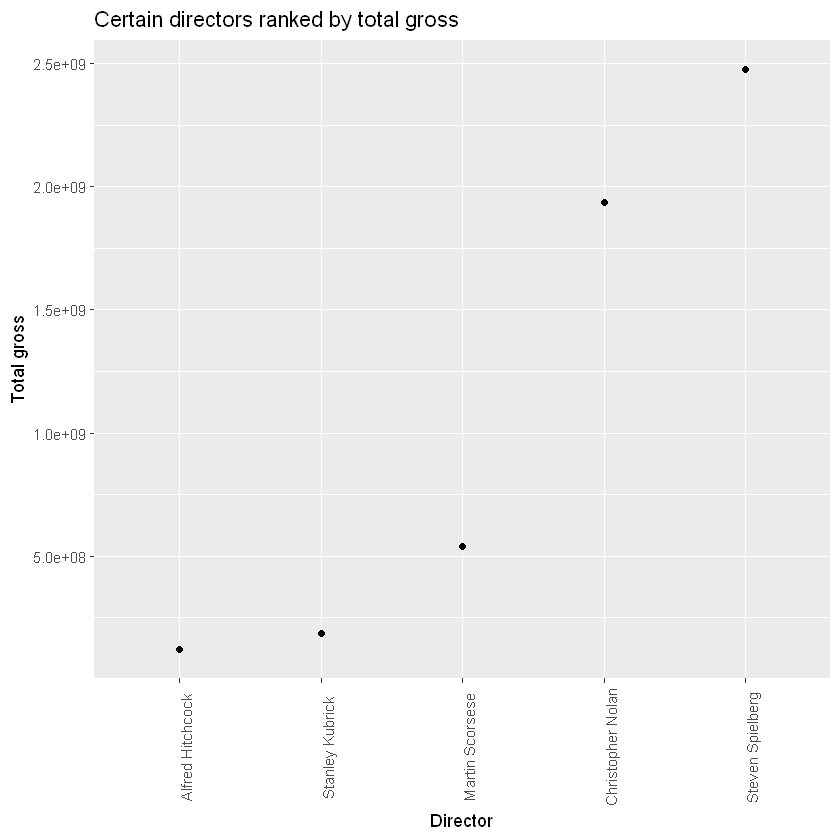

In [52]:
total_gross_director_scatter <-
  filtered_data %>%
  filter(Director == "Alfred Hitchcock"| 
           Director == "Christopher Nolan" | 
           Director == "Stanley Kubrick" | 
           Director == "Steven Spielberg" | 
           Director == "Martin Scorsese") %>% 
  group_by(Director) %>% 
  summarize(total_gross = sum(na.omit(Gross))) %>% 
  arrange(desc(total_gross)) %>% 
  ggplot(aes(x = reorder(Director, total_gross), total_gross)) +
    geom_point() +
    theme(axis.text.x = element_text(angle = 90)) +
    labs(x = "Director", y = "Total gross",
       title = "Certain directors ranked by total gross")
total_gross_director_scatter

This is the same 5 directors, but instead of being ranked by their IMDB score, it is by their total gross revenue of their films. To no surprise, the king of blockbuster films has the highest total gross revenue, while more inaccessible directors such as Kubrick and Hitchcock falter much more when it comes to creating box office revenue. 

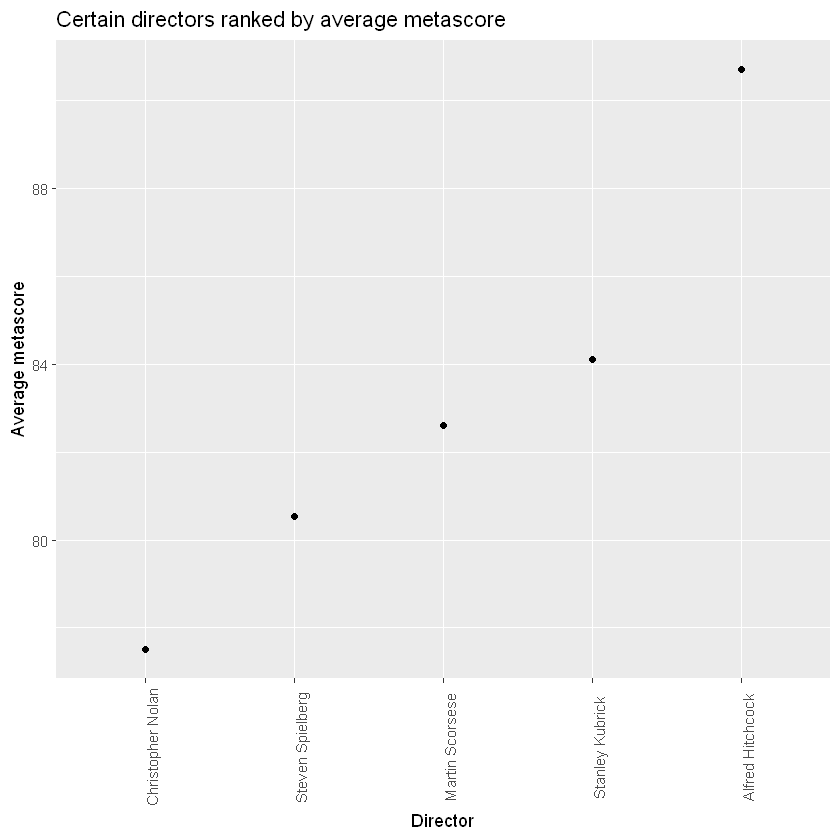

In [53]:
avg_metascore_director_scatter <-
  filtered_data %>%
  filter(Director == "Alfred Hitchcock"| 
           Director == "Christopher Nolan" | 
           Director == "Stanley Kubrick" | 
           Director == "Steven Spielberg" | 
           Director == "Martin Scorsese") %>% 
  group_by(Director) %>% 
  summarize(avg_metascore = mean(na.omit(Meta_score))) %>% 
  arrange(desc(avg_metascore)) %>% 
  ggplot(aes(x = reorder(Director, avg_metascore), avg_metascore)) +
    geom_point() +
    theme(axis.text.x = element_text(angle = 90)) +
    labs(x = "Director", y = "Average metascore",
       title = "Certain directors ranked by average metascore")
avg_metascore_director_scatter

This is a simple chart to show what directors' metacritic believes is the best. It is interesting to see the differences between who IMDB and metascore believes is the best of the best. Here we have Alfred taking the crown compared to the other directors. 

Warning message:
"Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`)."


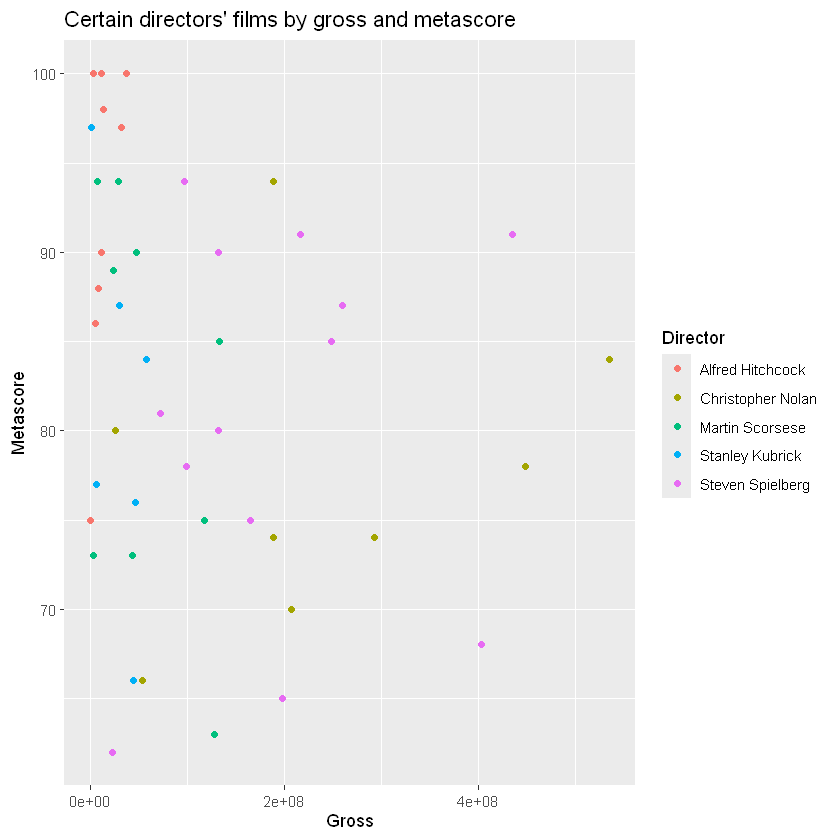

In [54]:
metascore_gross_scatter <-
  filtered_data %>% 
  filter(Director == "Alfred Hitchcock" | 
           Director == "Christopher Nolan" | 
           Director == "Stanley Kubrick" | 
           Director == "Steven Spielberg" | 
           Director == "Martin Scorsese") %>%
  ggplot(aes(Gross, Meta_score, color = Director)) +
    geom_point() +
    labs(x = "Gross", y = "Metascore",
       title = "Certain directors' films by gross and metascore")
metascore_gross_scatter

# 2.4 Year

Warning message in geom_histogram(stat = "identity"):
"Ignoring unknown parameters: `binwidth`, `bins`, and `pad`"
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`)."


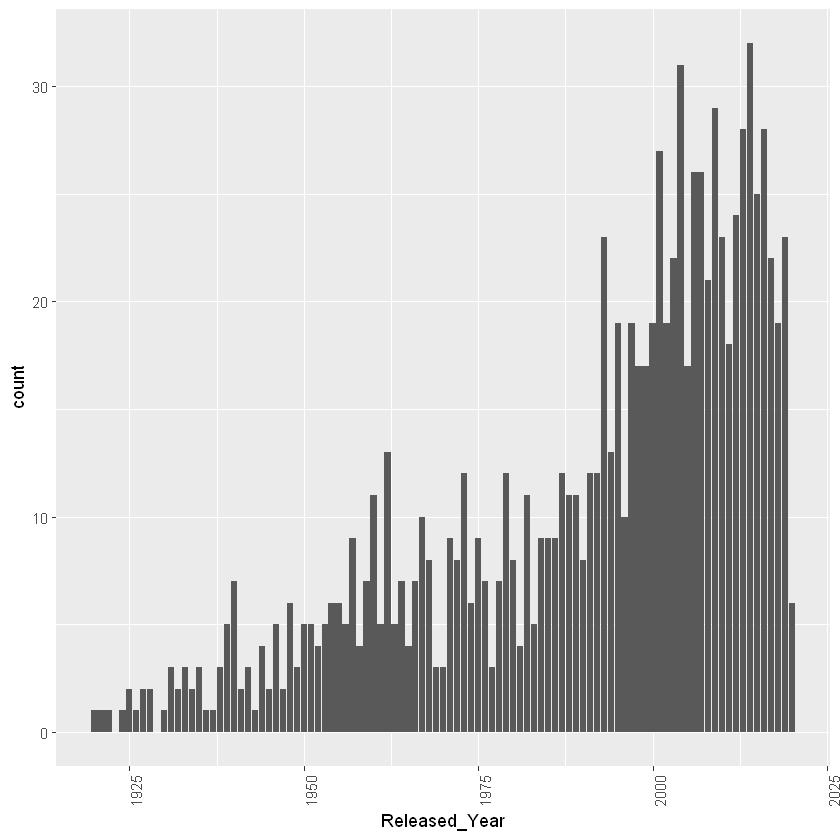

In [55]:
movie_each_year<-filtered_data %>% 
                count(Released_Year) %>% 
                rename(count=n)

ggplot(movie_each_year,aes(x=Released_Year,y=count))+
  geom_histogram(stat='identity')+
  theme(axis.text.x = element_text(angle = 90))

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_point()`)."


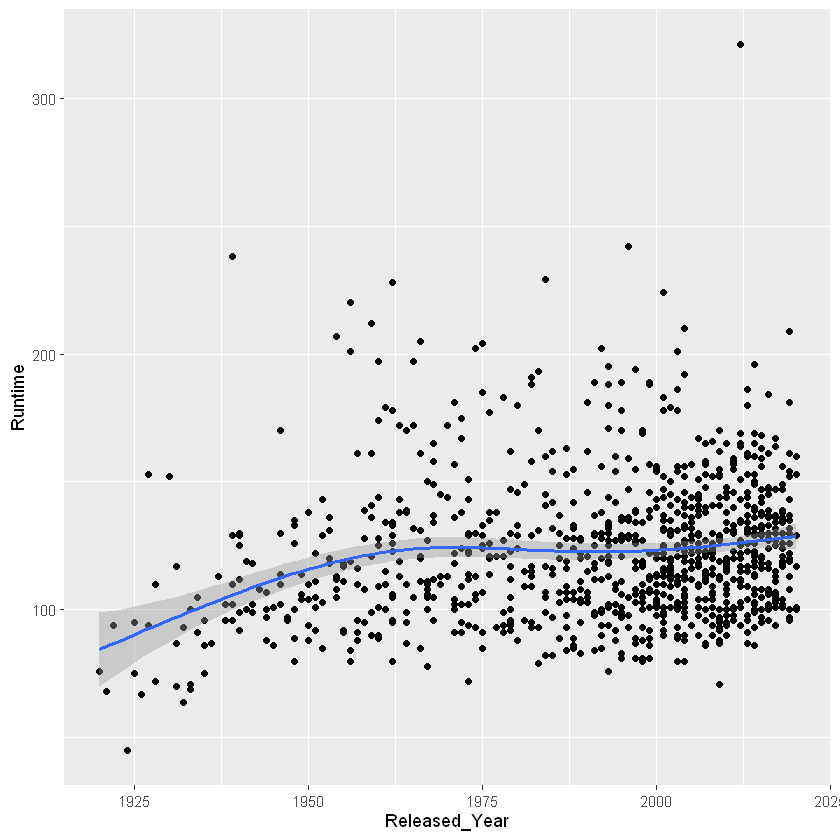

In [56]:
ggplot(filtered_data,aes(Released_Year,Runtime),color=Genre1)+geom_point()+geom_smooth()

This scatter plot shows the increase of runtime that films have undergone. As technology progressed in the early 20th century, the runtime of movies experienced the largest increase. However, as of the last decades, runtime has tended to plateau and remain consistent around the 2 hour mark. 

In [57]:
total_years <-
  filtered_data %>% 
  count(Released_Year)
total_years <- na.omit(total_years)

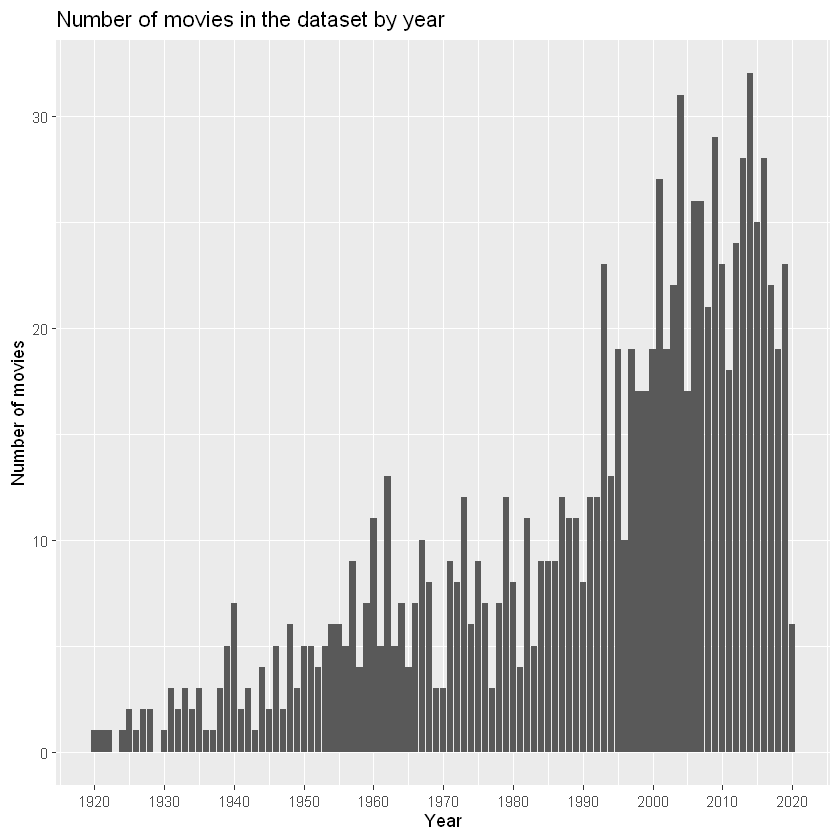

In [58]:
total_years_bargraph <-
  ggplot(total_years, aes(Released_Year, n)) + 
  geom_bar(stat = 'identity') +
  scale_x_continuous(n.breaks = 11) +
  labs(x = "Year", y = "Number of movies",
       title = "Number of movies in the dataset by year")
total_years_bargraph

This is another bar graph showing the number of movies in the top 1000 IMDB list and which year they were released. Again as technology progresses, we see an uptick in movies released. 

In [59]:
gross_years <- 
  filtered_data %>%
  arrange(desc(Gross)) %>% 
  head(150) %>%
  count(Released_Year)

Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`)."


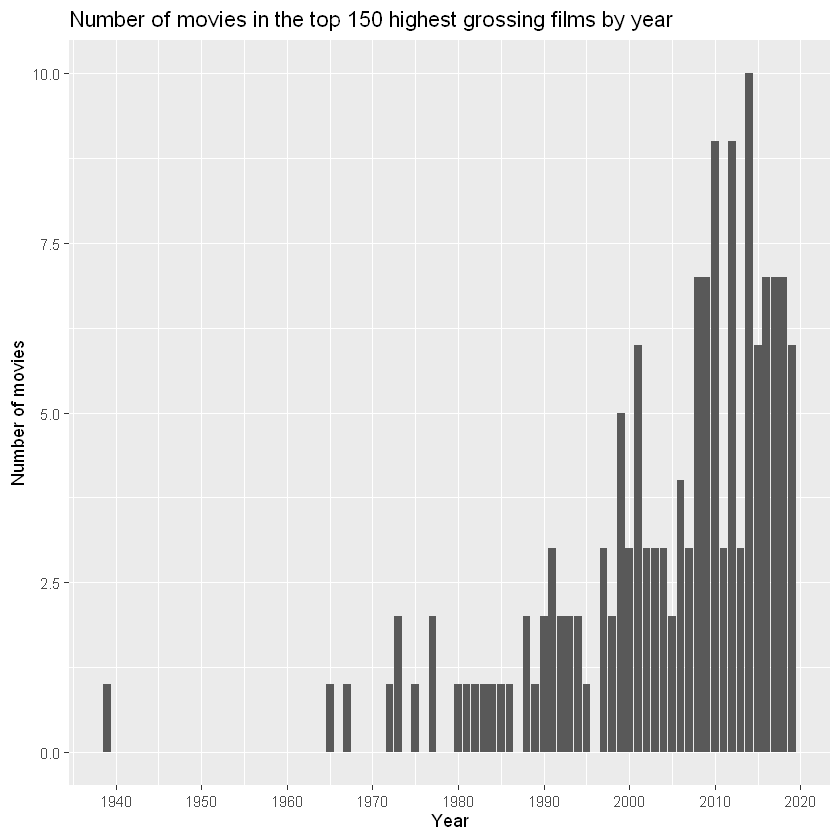

In [60]:
gross_years_bargraph <-
  ggplot(gross_years, aes(Released_Year, n)) + 
  geom_bar(stat = 'identity') + 
  scale_x_continuous(n.breaks = 11) +
  labs(x = "Year", y = "Number of movies", 
       title = "Number of movies in the top 150 highest grossing films by year")
gross_years_bargraph

This bar graph shows the years that the top 150 highest grossing films in this data set were released. It appears that the 2000s-2010s were a good decade for the movie industry. 

In [61]:
metascore_years <- 
  filtered_data %>%
  arrange(desc(Meta_score)) %>% 
  head(150) %>% 
  count(Released_Year)

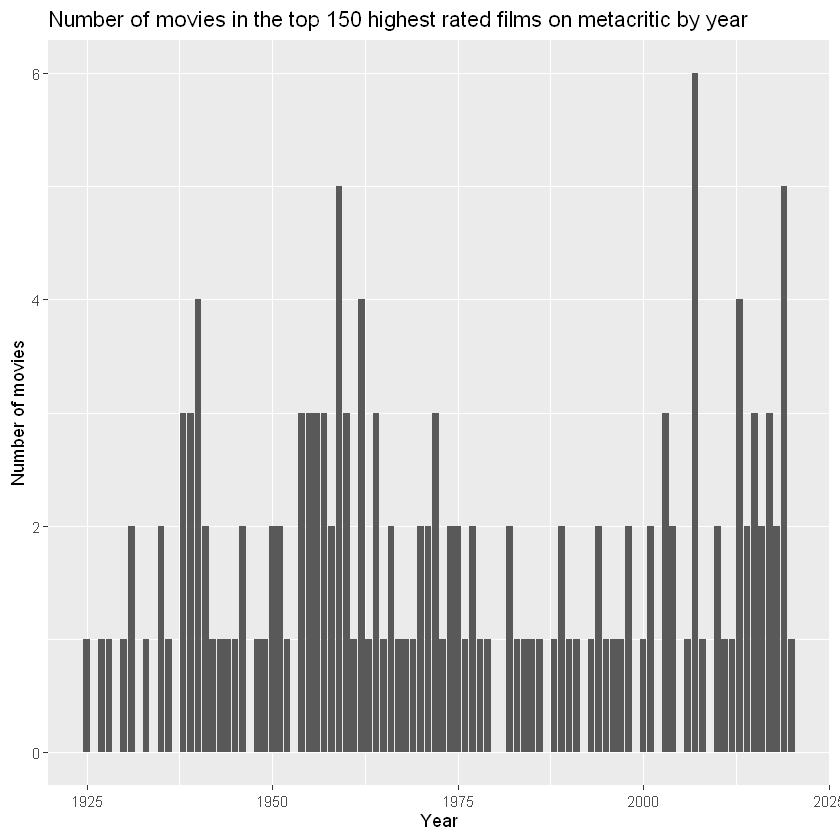

In [62]:
metascore_years_bargraph <-
  ggplot(metascore_years, aes(Released_Year, n)) + 
  geom_bar(stat = 'identity') +
  labs(x = "Year", y = "Number of movies", 
       title = "Number of movies in the top 150 highest rated films on metacritic by year")
metascore_years_bargraph

This bar graph shows the years that the highest rated movies on metacritic released. It appears that metacritic really enjoyed the 2000s as a decade of greatly reviewed films.

In [63]:
imdb_years <- 
  filtered_data %>%
  arrange(desc(IMDB_Rating)) %>% 
  head(150) %>%
  count(Released_Year)

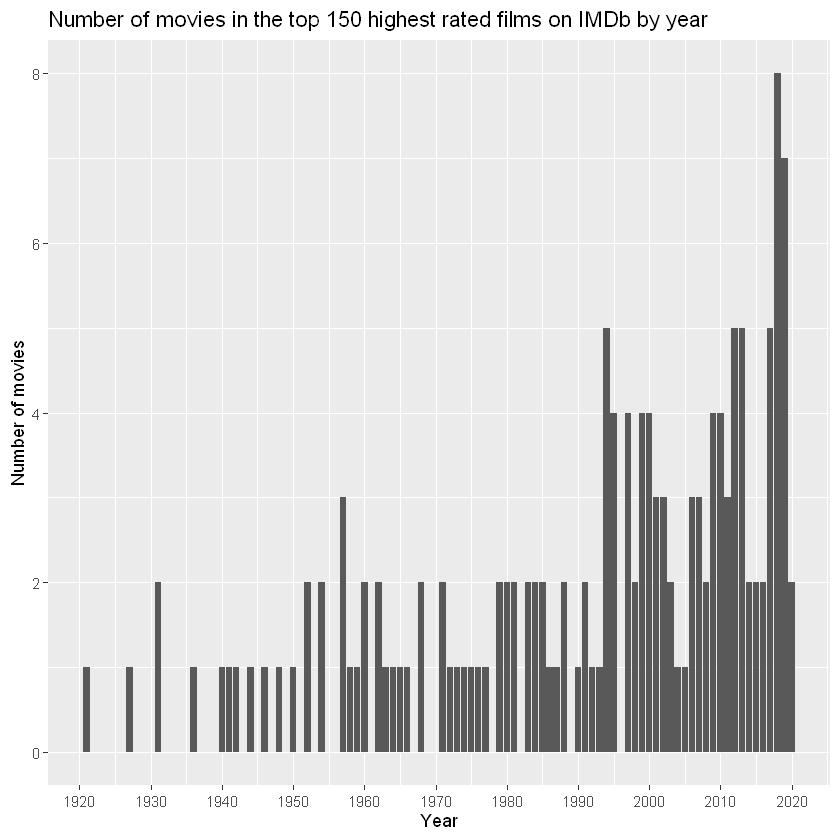

In [64]:
imdb_years_bargraph <-
  ggplot(imdb_years, aes(Released_Year, n)) + 
  geom_bar(stat = 'identity') +
  scale_x_continuous(n.breaks = 11) +
  labs(x = "Year", y = "Number of movies", 
       title = "Number of movies in the top 150 highest rated films on IMDb by year")
imdb_years_bargraph

# 2.5 IMDB,METASCORE,GROSS,NO_OF_VOTES

Warning message:
"Removed 169 rows containing missing values or values outside the scale range
(`geom_point()`)."


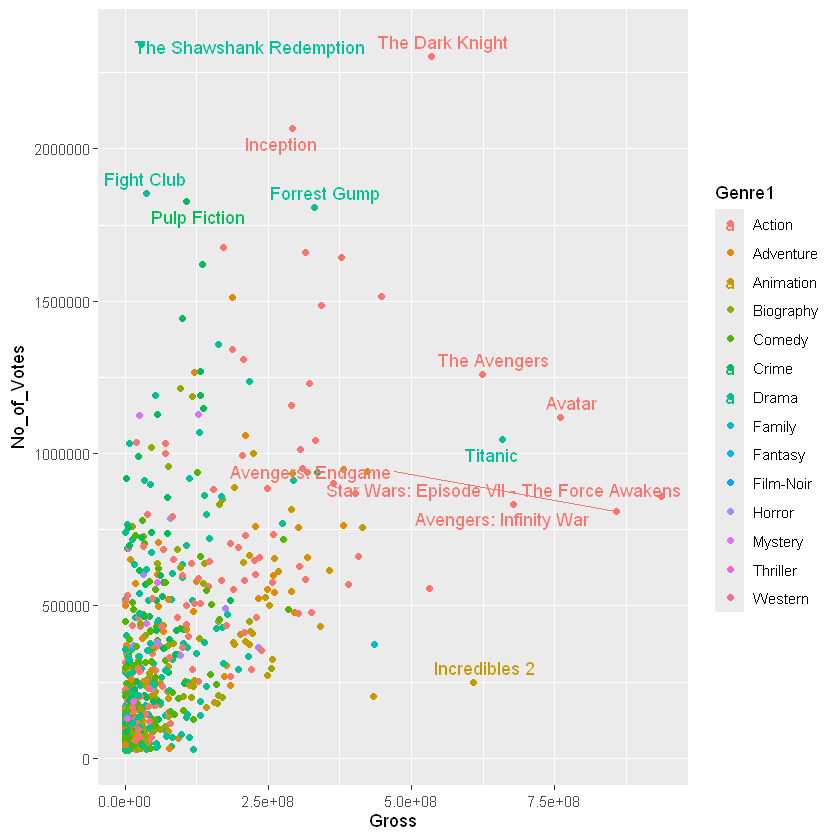

In [65]:
library(ggrepel)
extreme<- filtered_data %>% 
          filter(No_of_Votes>1800000|Gross>600000000)

filtered_data %>% 
ggplot(aes(x=Gross,y=No_of_Votes,color=Genre1)) + 
  geom_point() + 
  geom_text_repel(data=extreme, aes(label = Series_Title)) + 
  labs(text="geom_text_repel()")

#Colored sorted by genre, and ranked by gross and number of votes (reviews on IMDB.com), we believe that these are the most popular movies to the common movie theatre consumer. Everyone one these outliers is a blockbuster movie that generated an abundance of revenue and received a significant amount of reviews on IMDB. “The Dark Knight” directed by Christopher Nolan is the supreme outlier on this chart, with the most reviews and a significant amount of gross revenue in the box office. 

Series_Title,Gross
<chr>,<dbl>
Star Wars: Episode VII - The Force Awakens,936662225
Avengers: Endgame,858373000
Avatar,760507625
Avengers: Infinity War,678815482
Titanic,659325379
The Avengers,623279547
Incredibles 2,608581744
The Dark Knight,534858444
Rogue One,532177324


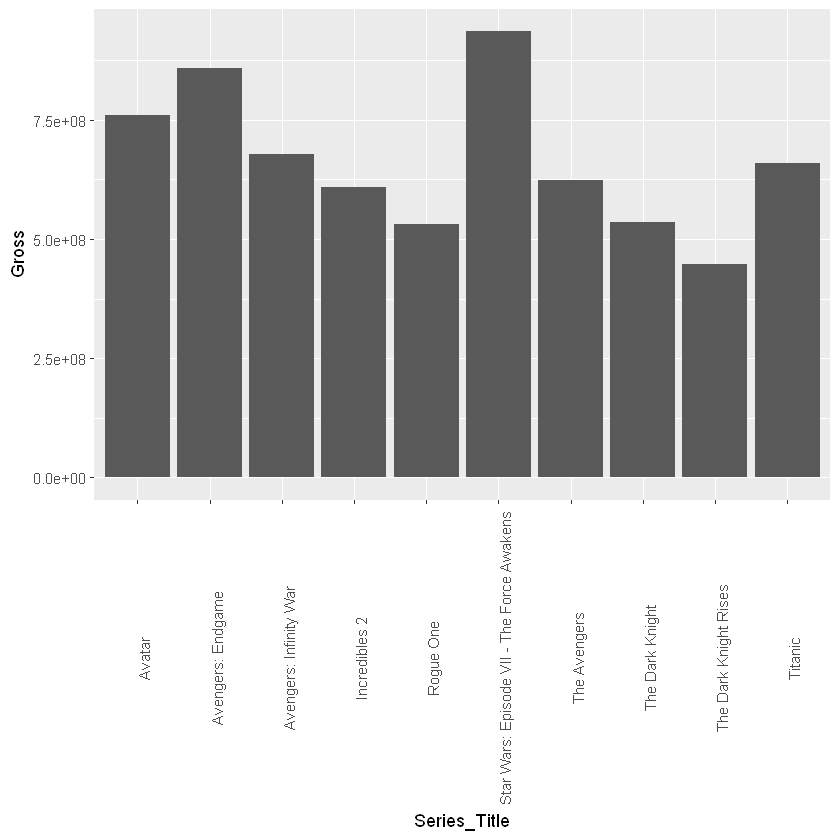

In [66]:
top10_gross_movie <- filtered_data %>% 
                    select(Series_Title, Gross) %>% 
                    top_n(10, Gross) %>% 
                    arrange(desc(Gross))

top10_gross_movie

ggplot(top10_gross_movie,aes(x=Series_Title, y=Gross))+
  geom_bar(stat='identity') + theme(axis.text.x = element_text(angle = 90))

In [67]:
dir.create("visualizations")

Warning message in dir.create("visualizations"):
"'visualizations' already exists"


#This is a simple list and bar graph to show which movies made the most revenue in the box office, and is a great indicator of what films garner the most popularity. 

Selecting by IMDB_Rating


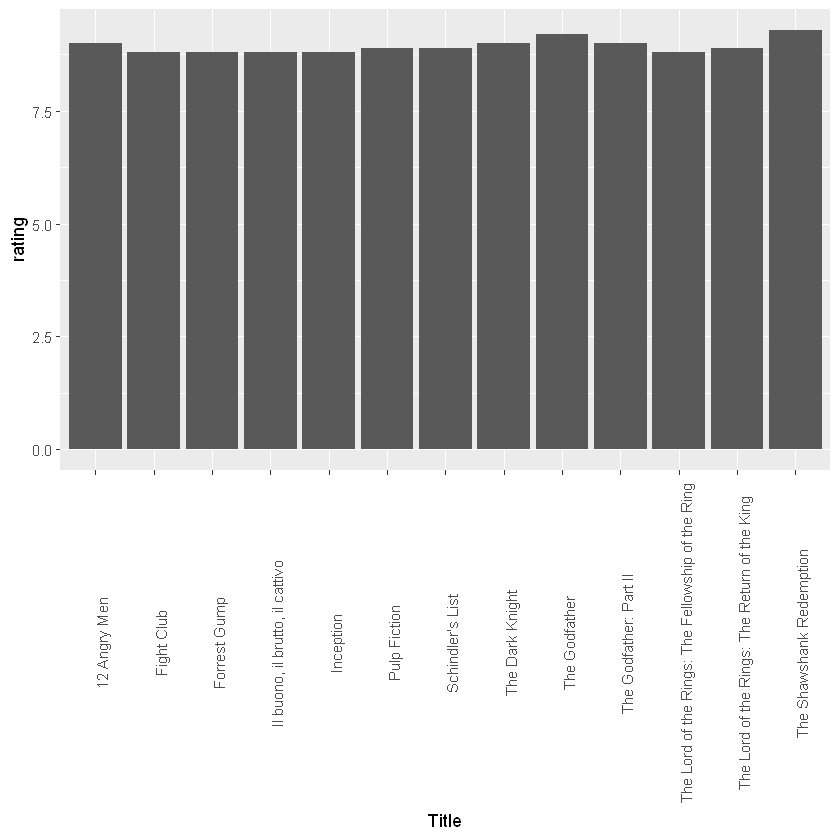

In [68]:
top10_rated_movie <- filtered_data %>% 
                    select(Series_Title, IMDB_Rating) %>% 
                    top_n(10,) %>% 
                    arrange(desc(IMDB_Rating))
ggplot(top10_rated_movie,aes(x=Series_Title, y=IMDB_Rating))+
  geom_bar(stat='identity') + theme(axis.text.x = element_text(angle = 90)) + xlab('Title')+ ylab('rating')

#Accompanying those lists, this bar graph shows the ten highest rated movies on IMDB.com



#### year2014

In [69]:
filtered_data %>% 
filter(Released_Year==2014) %>% 
  select(Series_Title,Runtime,Genre1,IMDB_Rating,Meta_score,Director,Star1,No_of_Votes,Gross)

Series_Title,Runtime,Genre1,IMDB_Rating,Meta_score,Director,Star1,No_of_Votes,Gross
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Interstellar,169,Adventure,8.6,74,Christopher Nolan,Matthew McConaughey,1512360,188020017
Whiplash,106,Drama,8.5,88,Damien Chazelle,Miles Teller,717585,13092000
Mommy,139,Drama,8.1,74,Xavier Dolan,Anne Dorval,50700,3492754
Haider,160,Action,8.1,NA,Vishal Bhardwaj,Shahid Kapoor,50445,901610
Relatos salvajes,122,Comedy,8.1,77,Damián Szifron,Darío Grandinetti,177059,3107072
Kis Uykusu,196,Drama,8.1,88,Nuri Bilge Ceylan,Haluk Bilginer,46547,165520
PK,153,Comedy,8.1,NA,Rajkumar Hirani,Aamir Khan,163061,10616104
The Grand Budapest Hotel,99,Adventure,8.1,88,Wes Anderson,Ralph Fiennes,707630,59100318
Gone Girl,149,Drama,8.1,79,David Fincher,Ben Affleck,859695,167767189


Warning message:
"Removed 250 rows containing missing values or values outside the scale range
(`geom_point()`)."


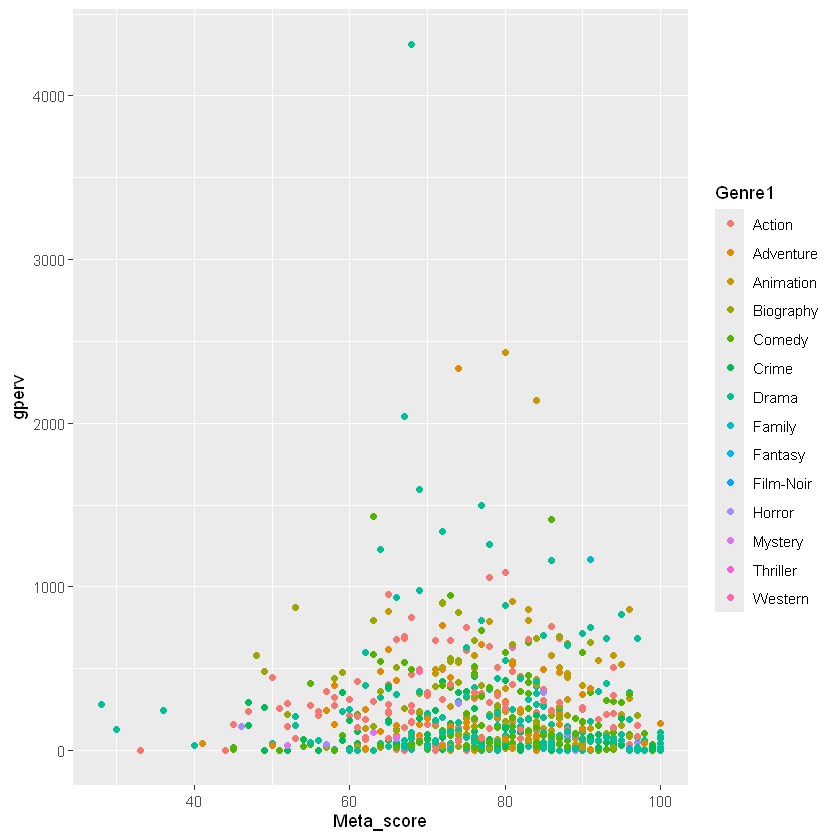

In [70]:
gross_per_vote<-filtered_data %>% 
          mutate(gperv=Gross/No_of_Votes)
ggplot(gross_per_vote,aes(x=Meta_score,y=gperv,color=Genre1))+geom_point()

#Here we used the mutate function to create a new variable called “gper”, which is the gross revenue divided by the number of votes that a movie received on IMDB.com We then plotted this function with the films metascore to create a chart on what we believe to be the most popular and reviewed movies. 

`geom_smooth()` using formula = 'y ~ x'


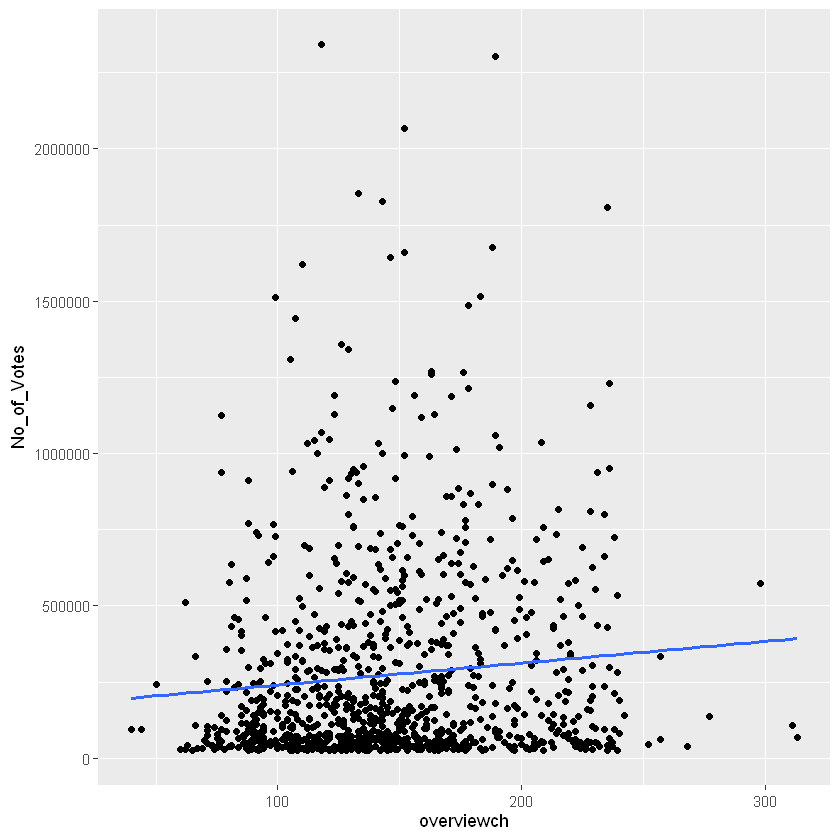

In [71]:
ncharyo<-filtered_data %>% 
  mutate(overviewch=nchar(Overview)) 
  ggplot(ncharyo,aes(x=overviewch,y=No_of_Votes))+
    geom_point()+
    geom_smooth(method="lm",se=FALSE)

This one is just for fun, but this is the length of the movie description plotted against the number of votes that it has received on the IMDB website. 

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 169 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 169 rows containing missing values or values outside the scale range
(`geom_point()`)."


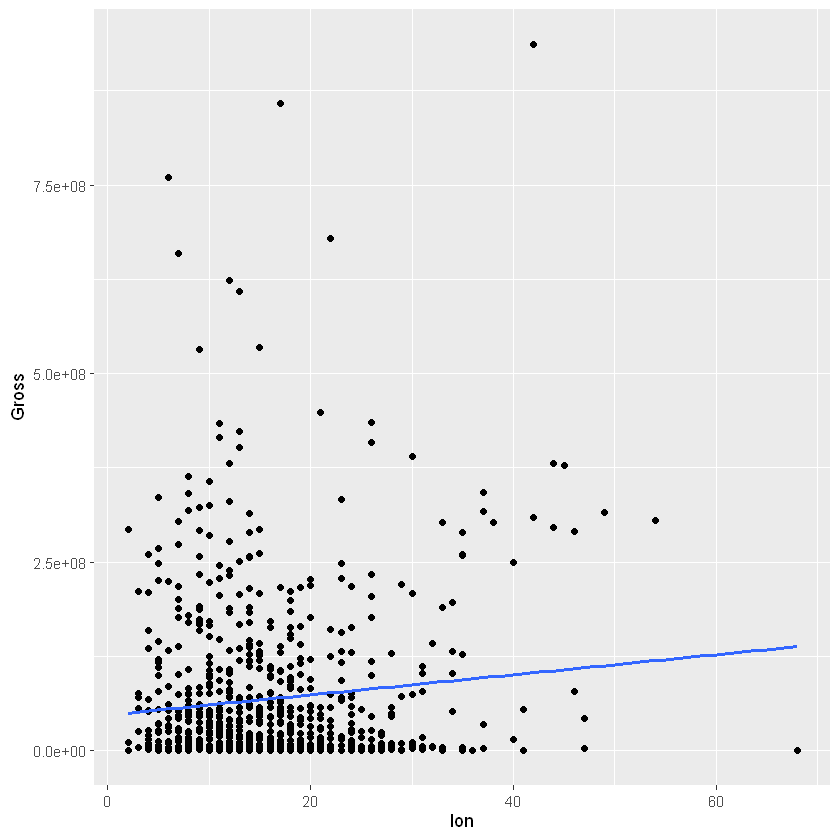

In [72]:
filtered_data %>% 
  mutate(lon=nchar(Series_Title)) %>% 
  ggplot(aes(x=lon,y=Gross))+
  geom_point()+
  geom_smooth(method="lm",se=FALSE)

Here’s another fun example, but this is the length of the movie title, plotted against the gross revenue. 
# 2.6 Distributions

#### Rating distribution

Warning message in geom_histogram(stat = "identity"):
"Ignoring unknown parameters: `binwidth`, `bins`, and `pad`"


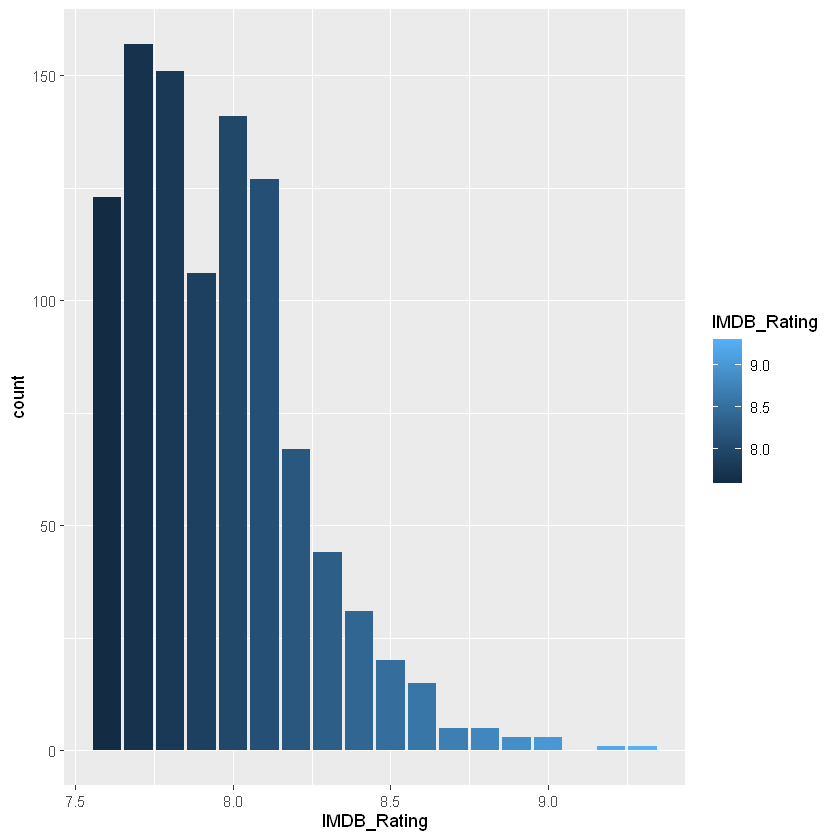

In [73]:
Rating_count<-filtered_data %>% 
                count(IMDB_Rating) %>% 
                rename(count=n)

  ggplot(Rating_count, aes(x= IMDB_Rating,y=count,fill=IMDB_Rating))+
  geom_histogram(stat="identity")

This is the distribution of the scores that movies have received in the top 1000 ranked IMDB data set. The majority of the films fall within the 7.5 to 8.5 rating.

This is the distribution of the scores that movies have received in the top 1000 ranked IMDB data set. The majority of the films fall within the 7.5 to 8.5 rating.

#### Meta_score distribution

Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`)."


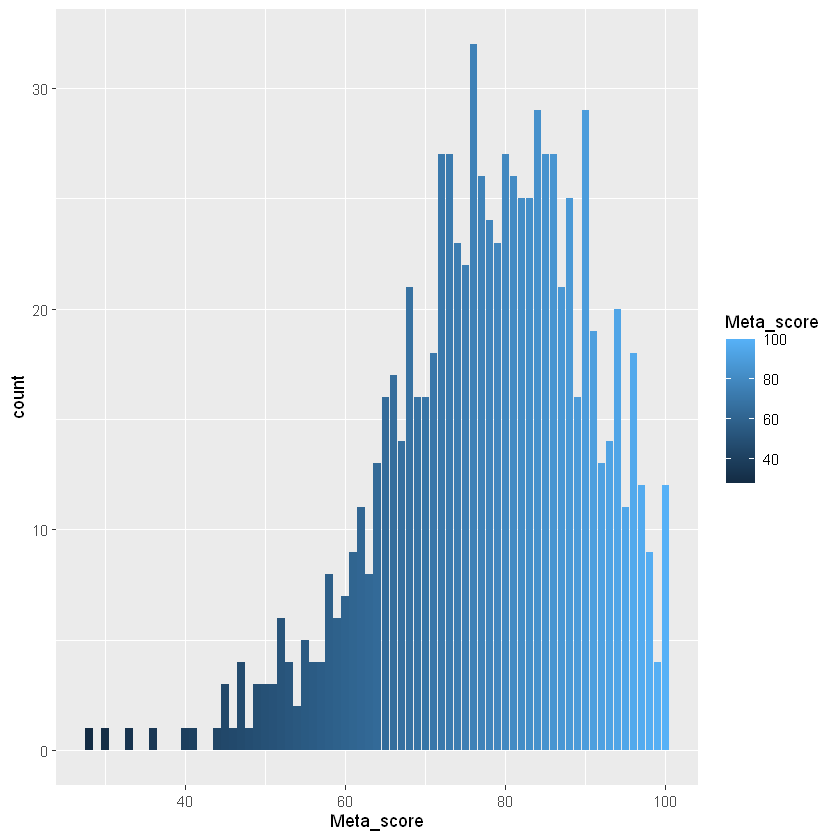

In [74]:
Meta_count<-filtered_data %>% 
                count(Meta_score)

  ggplot(Meta_count, aes(x= Meta_score, y=n, fill = Meta_score))+
  geom_bar(stat="identity")+
  labs(y="count")

This is the same thing as the chart above, but it is the distribution of metascores in the IMDB top 1000 data set. As you can see, the majority of the films garner around the 70 to 90 marks.

# 3. Data modeling


#### linear_regression between No_of_Votes and Gross

In [75]:
lmtest<-
filtered_data %>% 
lm(formula=No_of_Votes~Gross)
summary(lmtest)


Call:
lm(formula = No_of_Votes ~ Gross, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1037374  -154334   -94367    76286  2099249 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.929e+05  1.149e+04   16.79   <2e-16 ***
Gross       1.799e-03  8.902e-05   20.20   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 281500 on 829 degrees of freedom
  (169 observations deleted due to missingness)
Multiple R-squared:  0.3299,	Adjusted R-squared:  0.3291 
F-statistic: 408.2 on 1 and 829 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 169 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 169 rows containing missing values or values outside the scale range
(`geom_point()`)."


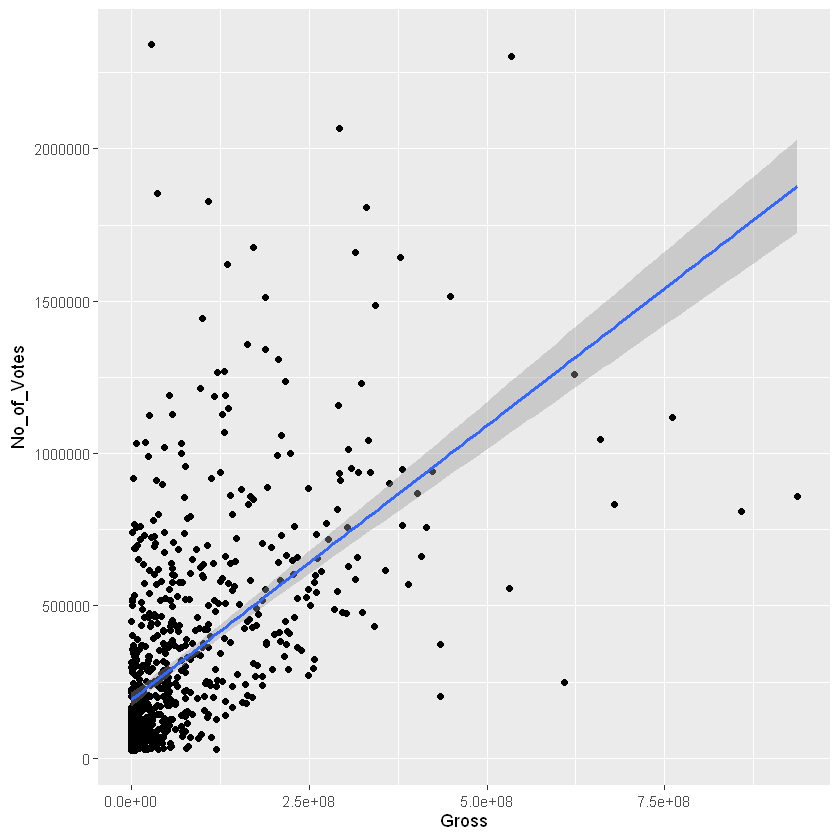

In [76]:
ggplot(filtered_data,aes(Gross,No_of_Votes))+geom_point()+geom_smooth(method="lm")


This is the first section of our data modeling section, and we believe that these two variables have the highest levels of correlation. The amount of votes that a movie receives on IMDB tends to be a good predictor of the gross revenue that the film got in its theatrical run. 

The output p-value is very small and the regression scatter plot shows there an actual correlation between the two variables

#### linear_regression between Metascore and Gross

In [77]:
lrmg <- filtered_data %>% 
        lm(formula=Meta_score~Gross)
summary(lrmg)


Call:
lm(formula = Meta_score ~ Gross, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.577  -7.687   1.293   8.722  22.742 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.771e+01  5.472e-01 142.022   <2e-16 ***
Gross       -3.372e-09  4.029e-09  -0.837    0.403    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.5 on 748 degrees of freedom
  (250 observations deleted due to missingness)
Multiple R-squared:  0.0009356,	Adjusted R-squared:  -0.0004001 
F-statistic: 0.7005 on 1 and 748 DF,  p-value: 0.4029


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 250 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 250 rows containing missing values or values outside the scale range
(`geom_point()`)."


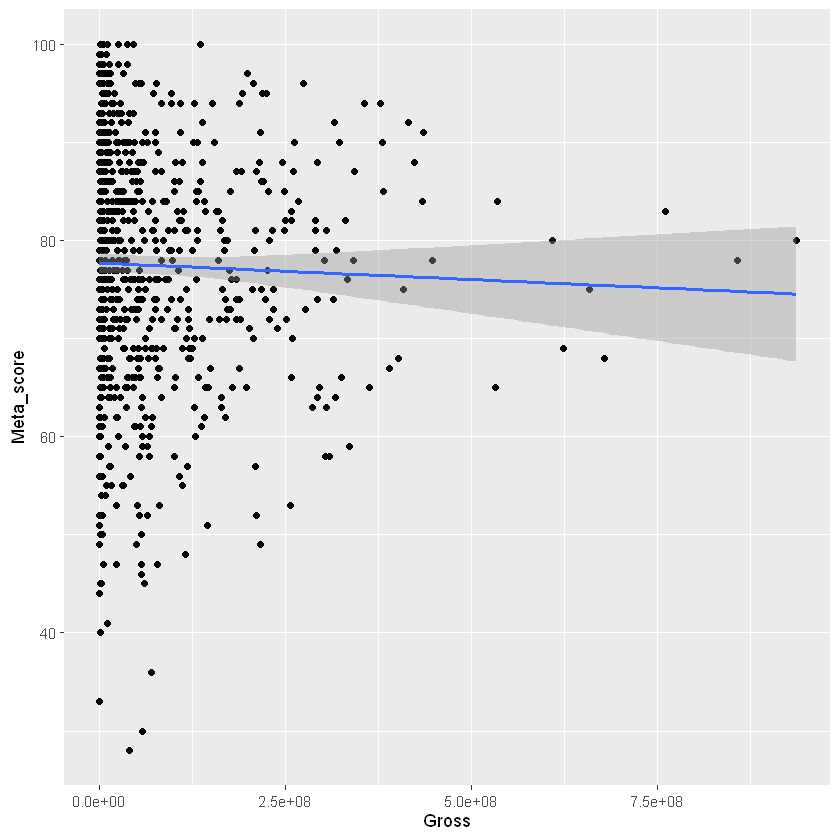

In [78]:
ggplot(filtered_data,aes(Gross,Meta_score))+geom_point()+geom_smooth(method="lm")

We believed that reviews such as metascore would be a great predictor of a film's gross revenue.

However, the output p-value is large that means it is statistically insignificant  and the regression scatter plot also shows there’s no correlation between the two variables

#### linear regression between IMDB_Rating and Gross

In [79]:
lrig <- filtered_data %>% 
        lm(formula=IMDB_Rating~Gross)
summary(lrig)


Call:
lm(formula = IMDB_Rating ~ Gross, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48073 -0.23239 -0.03257  0.16865  1.36289 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.930e+00  1.151e-02 688.715  < 2e-16 ***
Gross       2.475e-10  8.921e-11   2.775  0.00565 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2821 on 829 degrees of freedom
  (169 observations deleted due to missingness)
Multiple R-squared:  0.009201,	Adjusted R-squared:  0.008006 
F-statistic: 7.699 on 1 and 829 DF,  p-value: 0.005651


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 169 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 169 rows containing missing values or values outside the scale range
(`geom_point()`)."


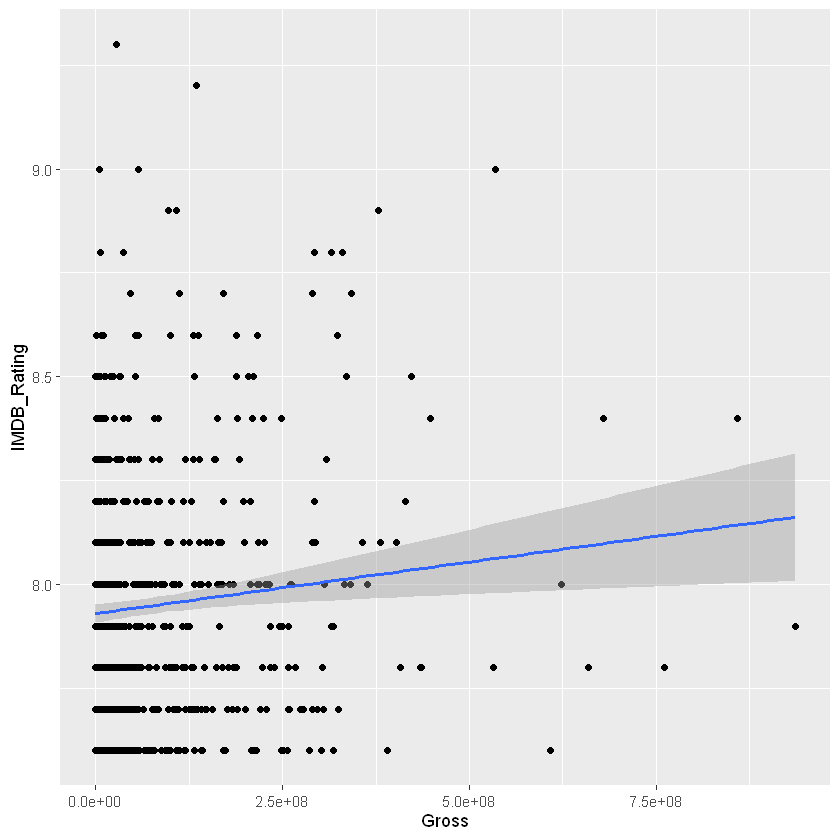

In [80]:
ggplot(filtered_data,aes(Gross,IMDB_Rating))+geom_point()+geom_smooth(method="lm")

As we were completing this project, we were shocked to see that the IMDB score of a film has little to no impact on the gross revenue that a film receives. There is little to no correlation between these two variables. 

`geom_smooth()` using formula = 'y ~ x'


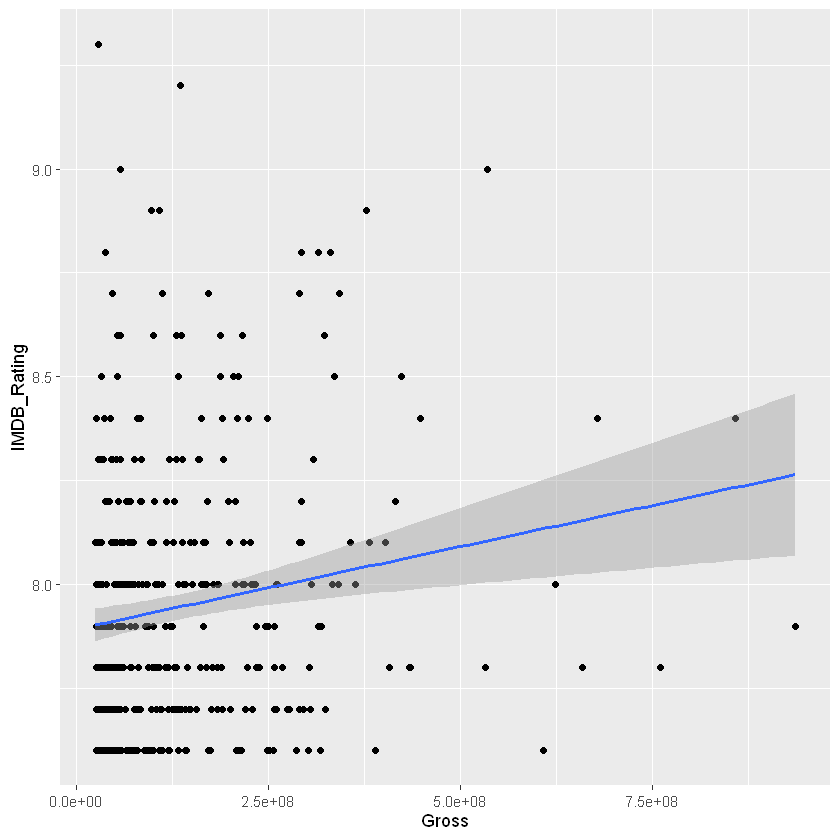

In [81]:
filtered_data %>% 
  filter(Gross>25000000) %>% 
ggplot(aes(Gross,IMDB_Rating))+geom_point()+geom_smooth(method="lm")

Here we filtered the data set for movies that have gross over $25000000 and we still did not find a correlation between these two variables. This was a very shocking find for our group as we all went into this thinking that ratings would be a good indicator of gross. However, this disproves that notion. 

In [82]:
top_30_actor <- total_actors %>% 
  left_join(pivoted_actor_data, by="Stars")

In [83]:
lrcat <- top_30_actor %>% 
         lm(formula=Gross~Stars)
summary(lrcat)


Call:
lm(formula = Gross ~ Stars, data = .)

Residuals:
       Min         1Q     Median         3Q        Max 
-413930379  -44709427   -8721819   25332717  515307072 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               4761731   45851336   0.104 0.917381    
StarsAl Pacino           44562299   56871583   0.784 0.434137    
StarsBrad Pitt           82757655   57694999   1.434 0.152872    
StarsBruce Willis       102474033   64843581   1.580 0.115462    
StarsCary Grant           4615666   76035838   0.061 0.951650    
StarsChristian Bale     142187304   58653226   2.424 0.016146 *  
StarsClint Eastwood      46960087   58653226   0.801 0.424200    
StarsDenzel Washington   72112692   61135114   1.180 0.239442    
StarsEdward Norton       27688478   64843581   0.427 0.669792    
StarsEmma Watson        230119021   64843581   3.549 0.000473 ***
StarsEthan Hawke         23763153   61135114   0.389 0.697873    
StarsHarrison Ford      

Warning message:
"Removed 21 rows containing missing values or values outside the scale range
(`geom_bar()`)."


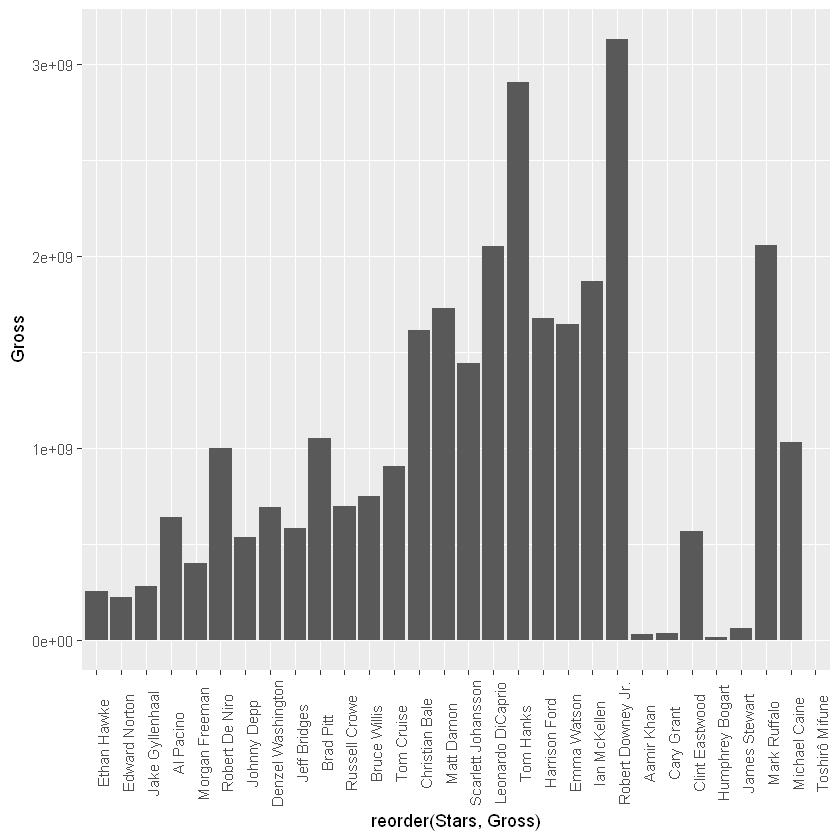

In [84]:
  ggplot(top_30_actor,aes(x=reorder(Stars, Gross),y=Gross))+
  geom_bar(stat = 'identity')+
  theme(axis.text.x = element_text(angle = 90))

Here we put the top 30 most appeared actors and try to see which one has the most correlation with the gross, although after running the linear regression the output does show us that some actors such as Robert Downey Jr, Emma Watson, Ian McKellen… have a strong correlation with gross. But we believe that most of them are only here because of their participation in long series of good selling movies such as Harry Potter, Ironman, Avengers, lord of the rings… 
But there are a couple actors that we believe that does have a good relationship with boosting the gross such as Tom Hanks, Leonardo DiCarpio


In [85]:
top_30_director <- total_directors %>% 
  left_join(filtered_data, by="Director")

In [86]:
director_lm <- top_30_director %>% 
         lm(formula=Gross~Director)
summary(director_lm)


Call:
lm(formula = Gross ~ Director, data = .)

Residuals:
       Min         1Q     Median         3Q        Max 
-311247320  -19084443   -1509765   13308408  410860305 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    1139155   42374220   0.027  0.97859    
DirectorAlfonso Cuarón       115389936   56850981   2.030  0.04418 *  
DirectorAlfred Hitchcock      12095224   50927474   0.237  0.81260    
DirectorAndrei Tarkovsky       -967792   64727690  -0.015  0.98809    
DirectorBilly Wilder          10681661   54704882   0.195  0.84546    
DirectorCharles Chaplin        1135026   56850981   0.020  0.98410    
DirectorChristopher Nolan    241042609   51897608   4.645 7.46e-06 ***
DirectorClint Eastwood        72947426   51897608   1.406  0.16194    
DirectorDavid Fincher         88025155   51897608   1.696  0.09196 .  
DirectorDavid Lynch            5303649   59926196   0.089  0.92960    
DirectorDenis Villeneuve      60

Warning message:
"Removed 42 rows containing missing values or values outside the scale range
(`geom_bar()`)."


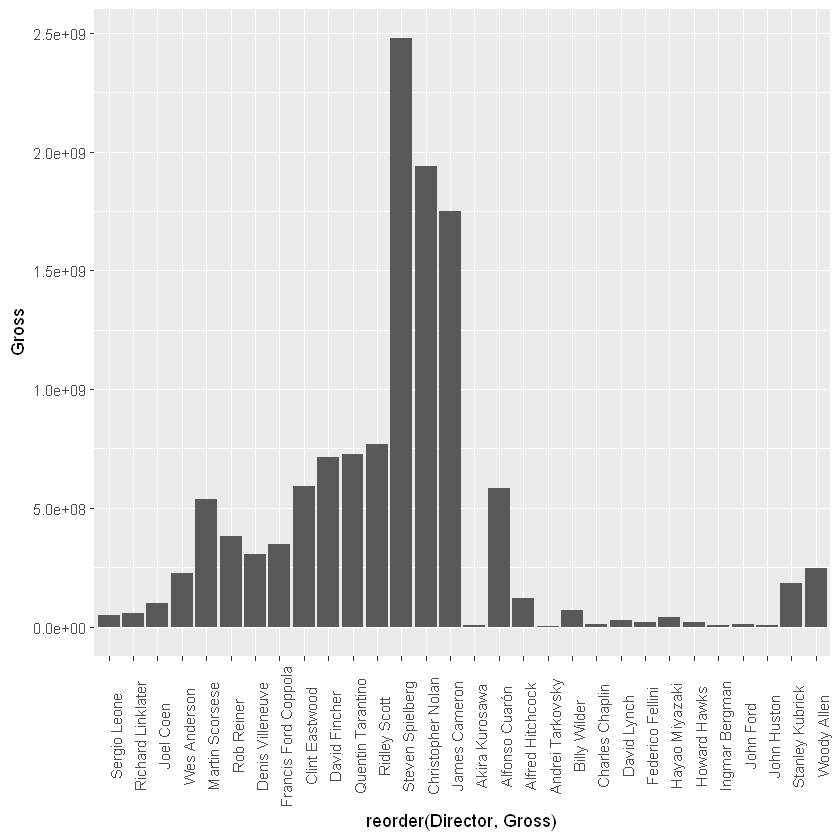

In [87]:
  ggplot(top_30_director,aes(x=reorder(Director, Gross),y=Gross))+
  geom_bar(stat = 'identity')+
  theme(axis.text.x = element_text(angle = 90))

Here we also try to put the top 30 most appeared director to see who have the strongest relationship with gross, which with no surprise Steven Spielberg, Christopher Nolan and James Cameron are showed in the top